# Bayesian Signal Detection and Statistical Analysis

This project performs statistical analysis, probability estimation, and signal classification using ML and MAP decision rules. It includes visualizations and performance evaluation for single-feature and pairwise-feature detectors.

### ML and MAP Decision Rules for Signal Detection

Saving patient_data.mat to patient_data.mat


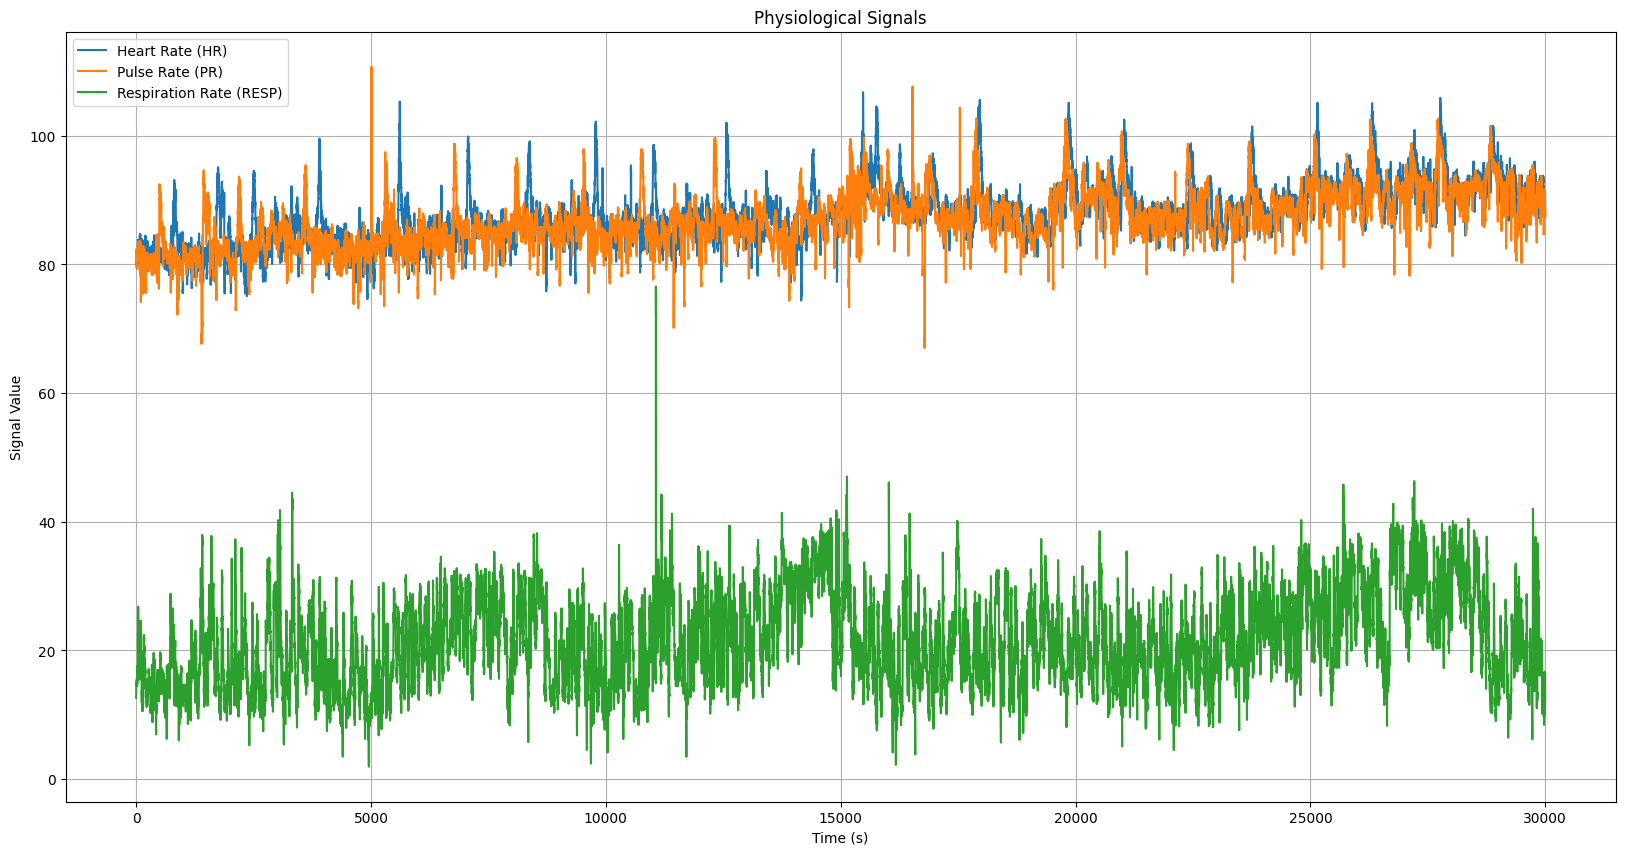

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio
from skimage.io import imread
from scipy import signal
from scipy.io import wavfile
from scipy import stats
import scipy.io

# Load the dataset
from google.colab import files
uploaded = files.upload() #have to do this once to get the file in the system, uncomment then
file_path = '/content/patient_data.mat'
mat_data = scipy.io.loadmat(file_path)
data = mat_data['data']
golden_alarms = mat_data['golden_alarms']

# Extract the signals
hr = data[0, :] # load columns 0-2 and all rows
pr = data[1, :]
resp = data[2, :]

# Create the time vector
time = np.arange(0, data.shape[1]) / 1 # array of 30,000 points

# Plot the signals
plt.figure(figsize=(20, 10)) # 20 inch width, 6 inch height
# plots hr, pr, resp against time with the respective labels
plt.plot(time, hr, label='Heart Rate (HR)')
plt.plot(time, pr, label='Pulse Rate (PR)')
plt.plot(time, resp, label='Respiration Rate (RESP)')
# set xy, title labels
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.title('Physiological Signals')

plt.legend() # create legend
plt.grid(True) # add grid
plt.show() # show the plot

### Probability Mass Function Estimation

### Probability Mass Function Estimation

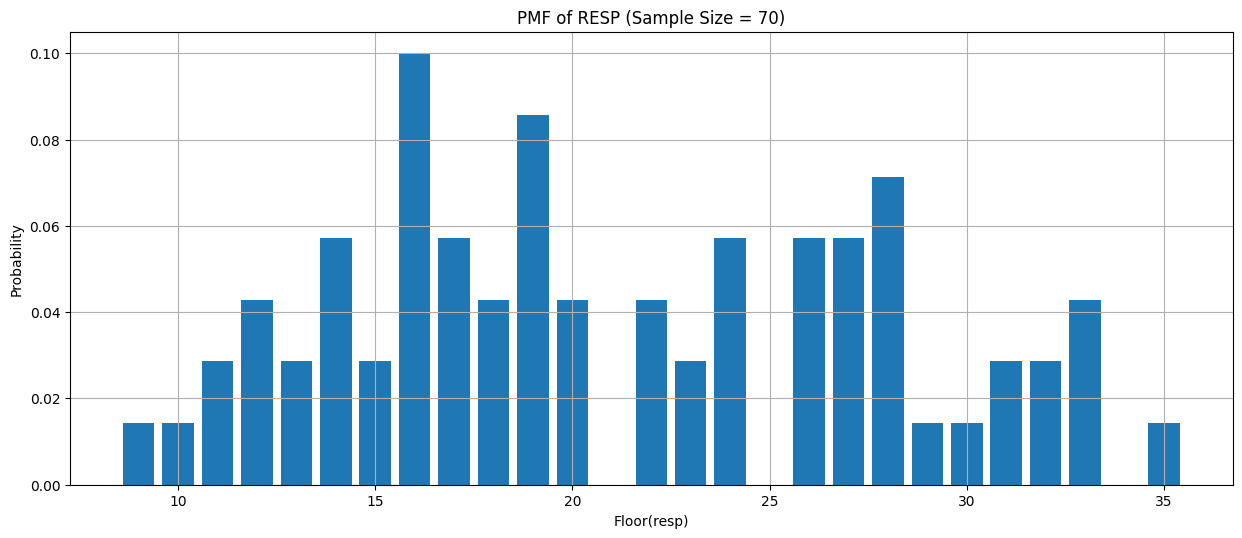

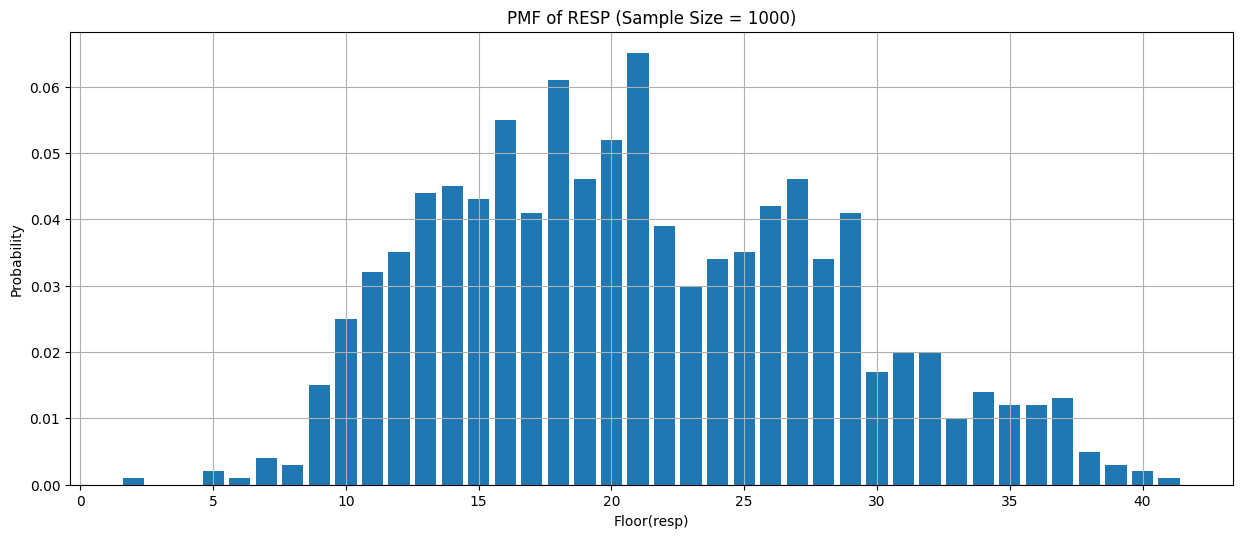

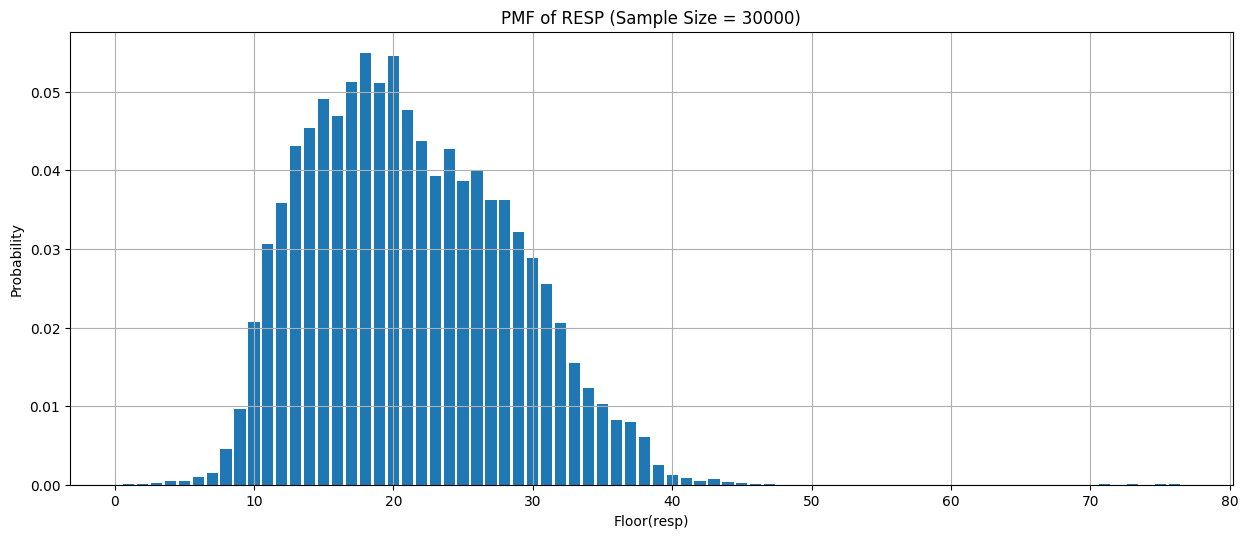

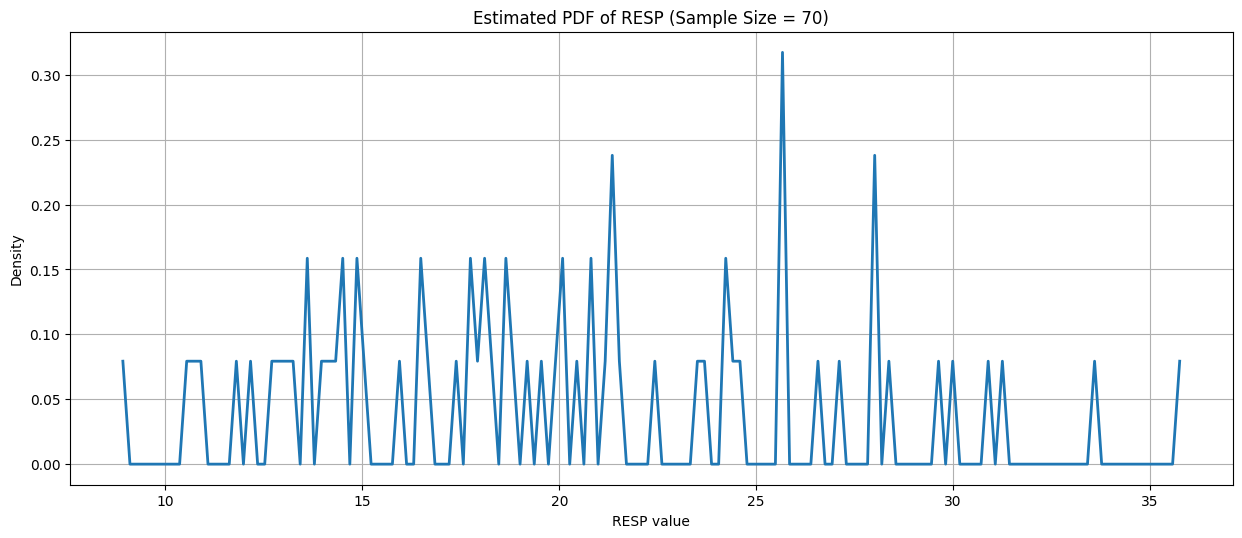

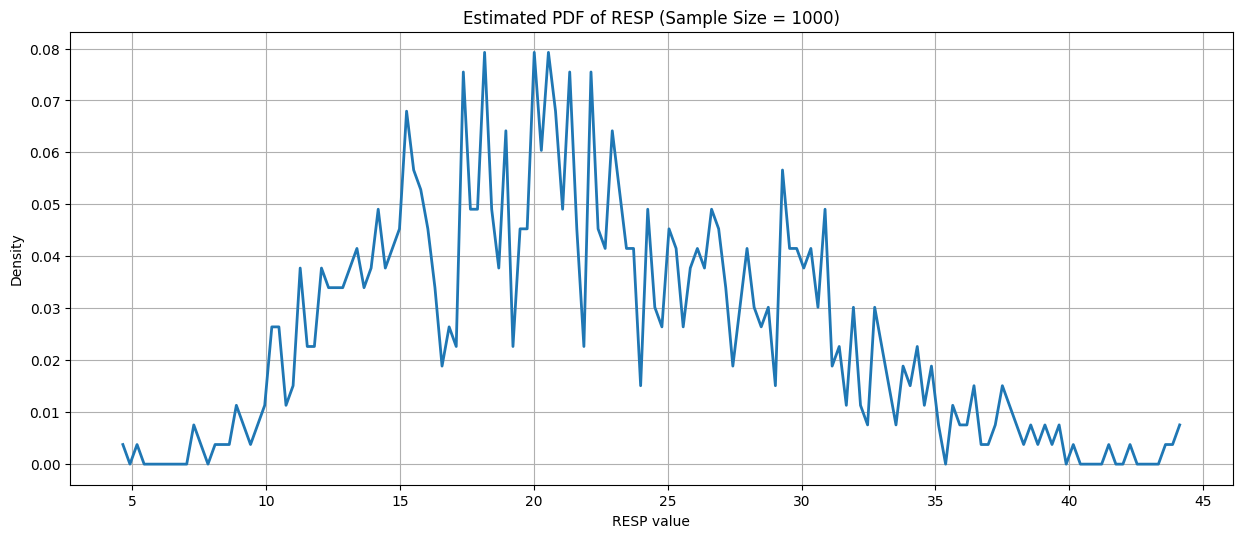

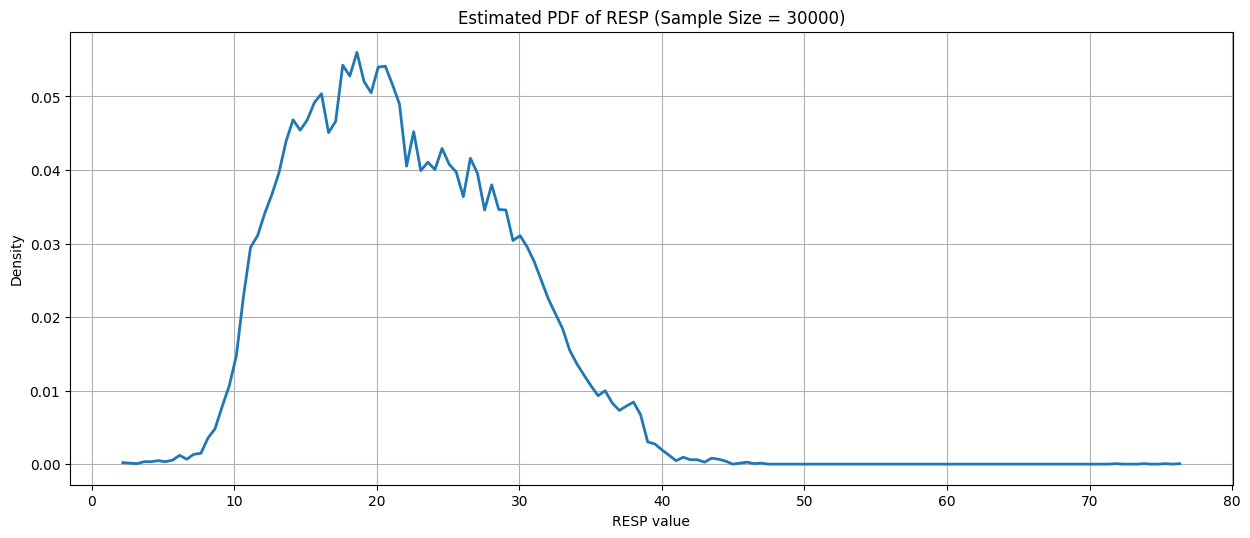

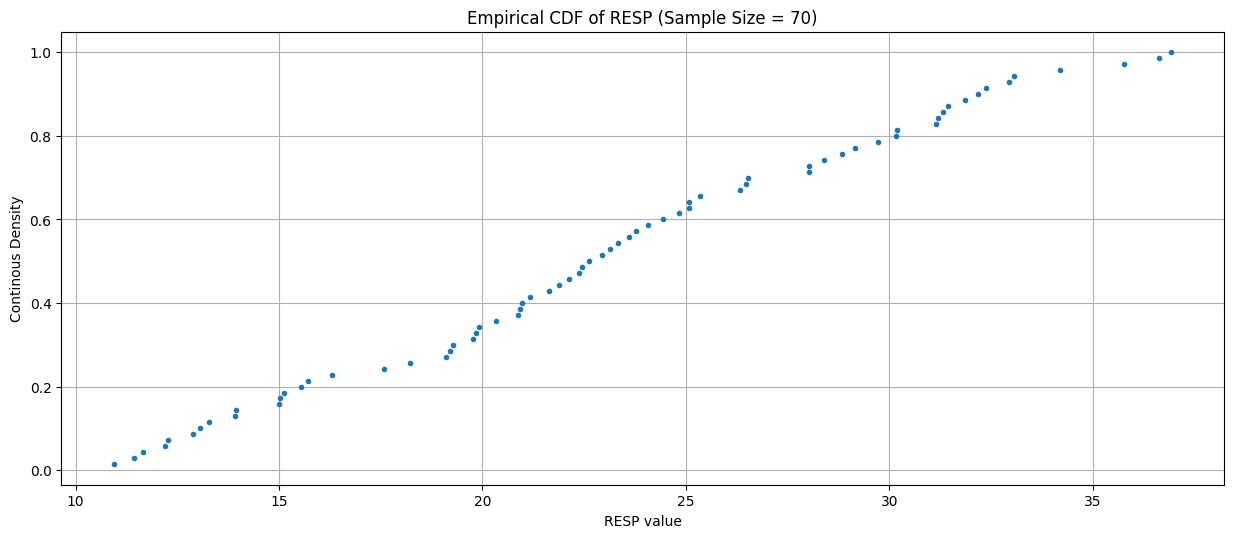

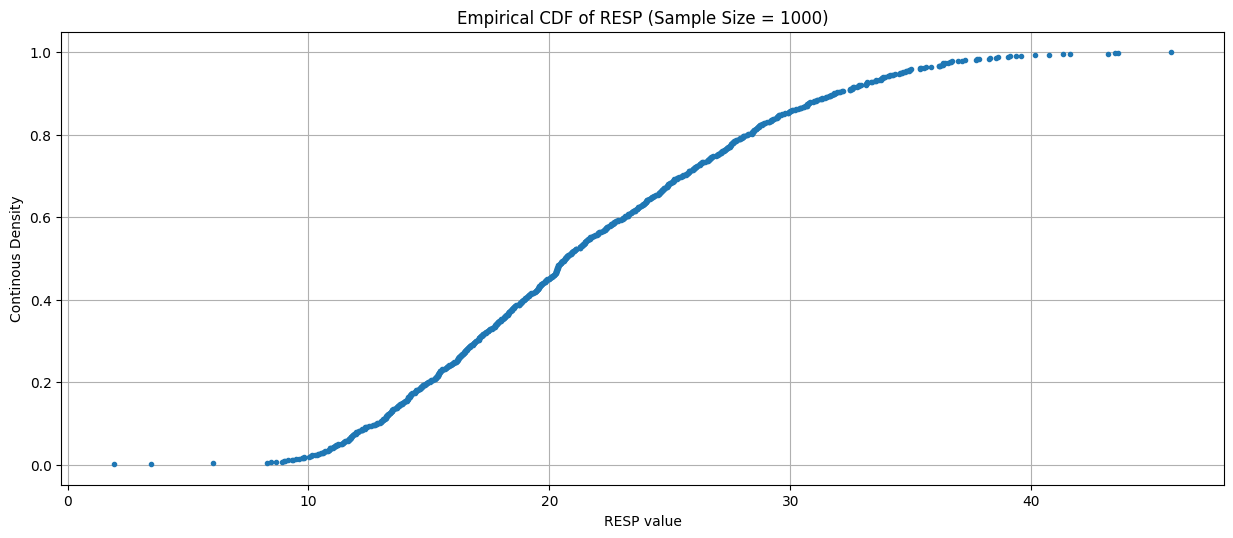

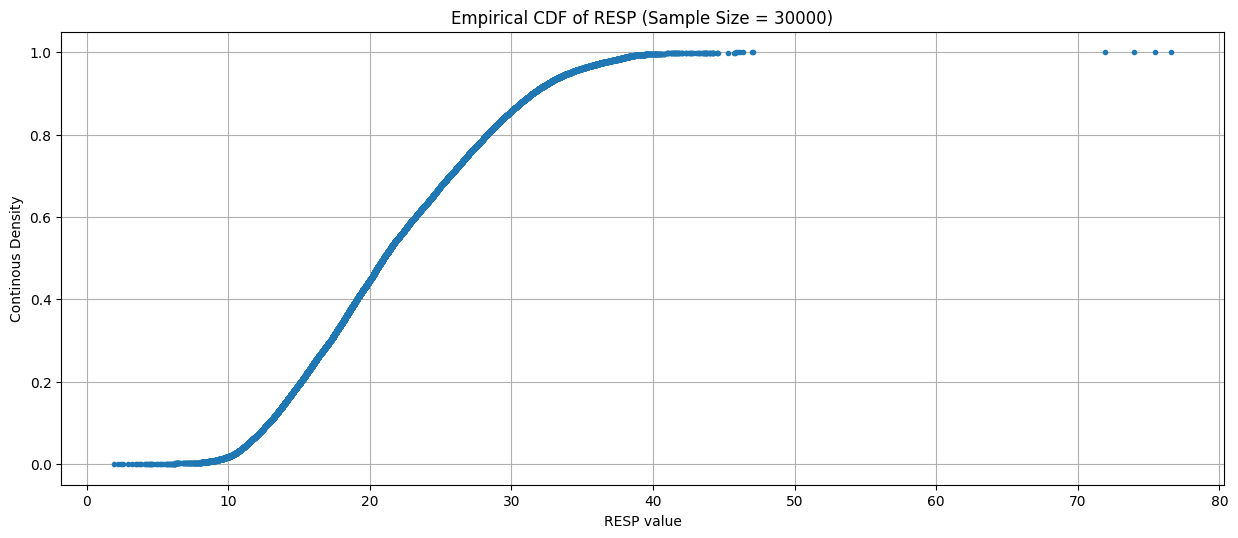

In [ ]:

three_sampleSize=[70,1000,30000]

for i, size in enumerate(three_sampleSize):
  #PMF
  sample=np.random.choice(resp,size=size,replace=False)
  sample_floor=np.floor(sample)

  bottom_pmf=np.arange(np.floor(sample.min()),np.floor(sample.max())+2)
  counts,_=np.histogram(sample_floor,bins=bottom_pmf)
  pmf_values =counts/size

  plt.figure(figsize=(15, 20))
  plt.subplot(3,1,i+1)
  plt.bar(bottom_pmf[:-1],pmf_values,0.8,align='center')
  plt.title(f'PMF of RESP (Sample Size = {size})')
  plt.xlabel('Floor(resp)')
  plt.ylabel('Probability')
  plt.grid(True)

for i, size in enumerate(three_sampleSize):
  #PDF
  sample=np.random.choice(resp,size=size,replace=False)
  counts_pdf,bottom_pdf = np.histogram(sample,150,density=True)
  bin_centers = (bottom_pdf[:-1] + bottom_pdf[1:]) / 2

  plt.figure(figsize=(15, 20))
  plt.subplot(3,1,i+1)
  plt.plot(bin_centers, counts_pdf, lw=2)
  plt.title(f'Estimated PDF of RESP (Sample Size = {size})')
  plt.xlabel('RESP value')
  plt.ylabel('Density')
  plt.grid(True)

for i, size in enumerate(three_sampleSize):
  #CDF
  sample=np.random.choice(resp,size=size,replace=False)
  sorted_sample = np.sort(sample)
  cdf = np.arange(1,size+1)/size

  plt.figure(figsize=(15,20))
  plt.subplot(3,1,i+1)
  plt.plot(sorted_sample, cdf, marker='.', linestyle='none')
  plt.title(f'Empirical CDF of RESP (Sample Size = {size})')
  plt.xlabel('RESP value')
  plt.ylabel('Continous Density')
  plt.grid(True)


plt.show()



#Differences between pmf and estimated pdf?
  # The PMF (Probability Mass Function) is the probability of discrete values
  # of the frequency of floored RESP values in each integer interval. It's shown in terms of a bar plot, and the probabilities sum to 1.
  # On the other hand, the estimated PDF (Probability Density Function) assumes the data is continuous and
  # gives a smooth curve that shows how densely values are concentrated across a range.
  # While the PMF shows sharp jumps at specific values, the PDF gives a continuous slope,
  # with peaks where data is more frequent.
#differences do you see as sample sizes increase from 70 to 30000?
  # As the sample size increases, the plots become smoother and give more broader representative of the underlying distribution.
  # With a small sample (e.g. 70), the PMF and CDF look more detailed and cluttered. But with larger samples
  # (1000 and especially 30000), the patterns become clearer and provide a broader
  # picture of the true data distribution. Essentially, we lose some of the noise and gain a more reliable estimate as sample size increases.


### Probability Mass Function Estimation

### Probability Mass Function Estimation

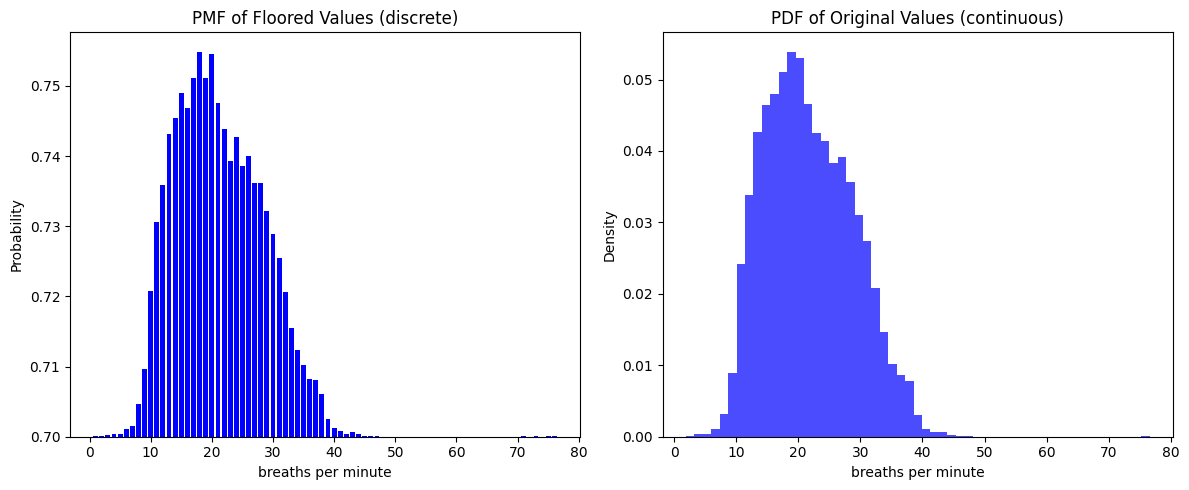

Discrete (Floored) Values:
Min probability: 0.000033
Max probability: 0.054900

Continuous Values:
individual probabilities approach zero we measure probability density instead

1) The left distribution is a probability mass function (PMF) discrete distribution
  of the respiration rates. Each bar represents the probability of observing that
  integer breath rate as "Y = floor(X)" converts bins from continuous to discrete
  which allows us to calculate probabilties of specific values.
  The right distribution is a probability density function (PDF) continous distribution
  The curve represents relative likelihood (density) across a range of values since
  continuous data requires measuring probability over intervals (area under the curve)
  and not single points.

2) The PMF shows significant probabilities for discrete values (max 8.08% for
  common integers), while the PDF's density peaks at ~0.08 but represents likelihood
   over intervals, not exact values. The PMF's minimum (0.0033

In [ ]:
#resp = np.random.normal(loc=20, scale=5, size=30000)
sample = resp[:30000]

# Calculate probabilities
sample_floor = np.floor(sample)
unique_Y, counts_Y = np.unique(sample_floor, return_counts=True)
pmf_Y = counts_Y / 30000

# Set up the figure
plt.figure(figsize=(12, 5))

# Plot 1: PMF of floored values (discrete)
plt.subplot(1, 2, 1)
plt.bar(unique_Y, pmf_Y, 0.8, 0.7, color='blue')
plt.title('PMF of Floored Values (discrete)')
plt.xlabel('breaths per minute')
plt.ylabel('Probability')

# Plot 2: Histogram of original values (continuous)
plt.subplot(1, 2, 2)
plt.hist(sample, 55, density=True, alpha=0.7, color='blue')
plt.title('PDF of Original Values (continuous)')
plt.xlabel('breaths per minute')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Print probability info
print("Discrete (Floored) Values:")
print(f"Min probability: {np.min(pmf_Y):.6f}")
print(f"Max probability: {np.max(pmf_Y):.6f}\n")

### Visualization of Detection Results

Task 1.1c - Threshold values for anomaly detection (96% confidence interval):
a (lower threshold, 2nd percentile): 10.1496
b (upper threshold, 98th percentile): 37.0862
Percentage of samples outside thresholds: 4.00%


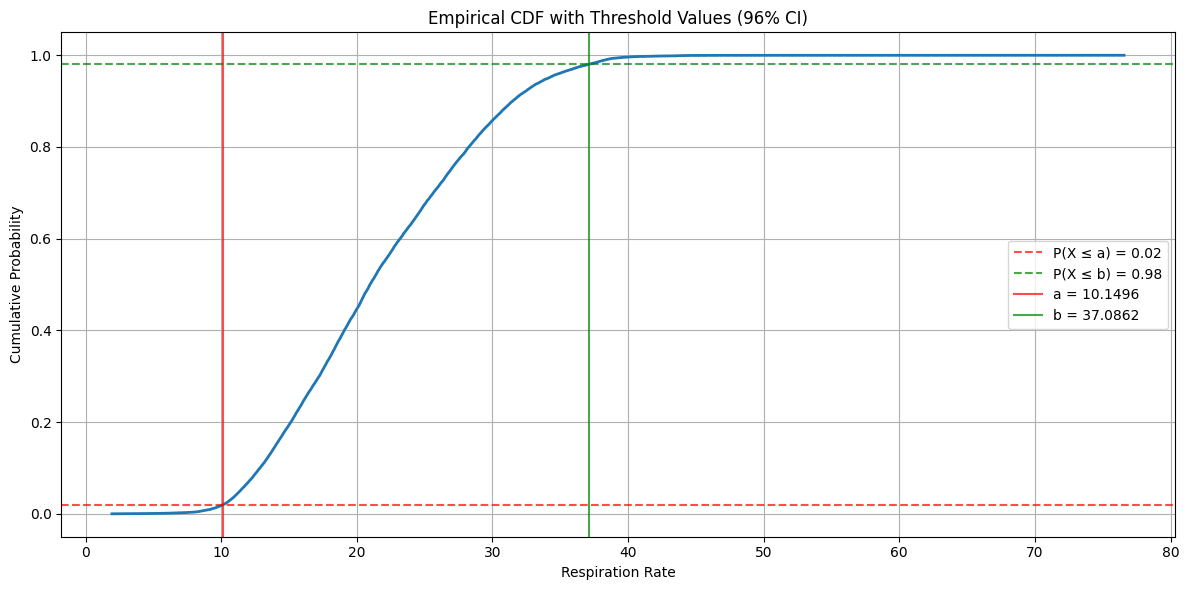

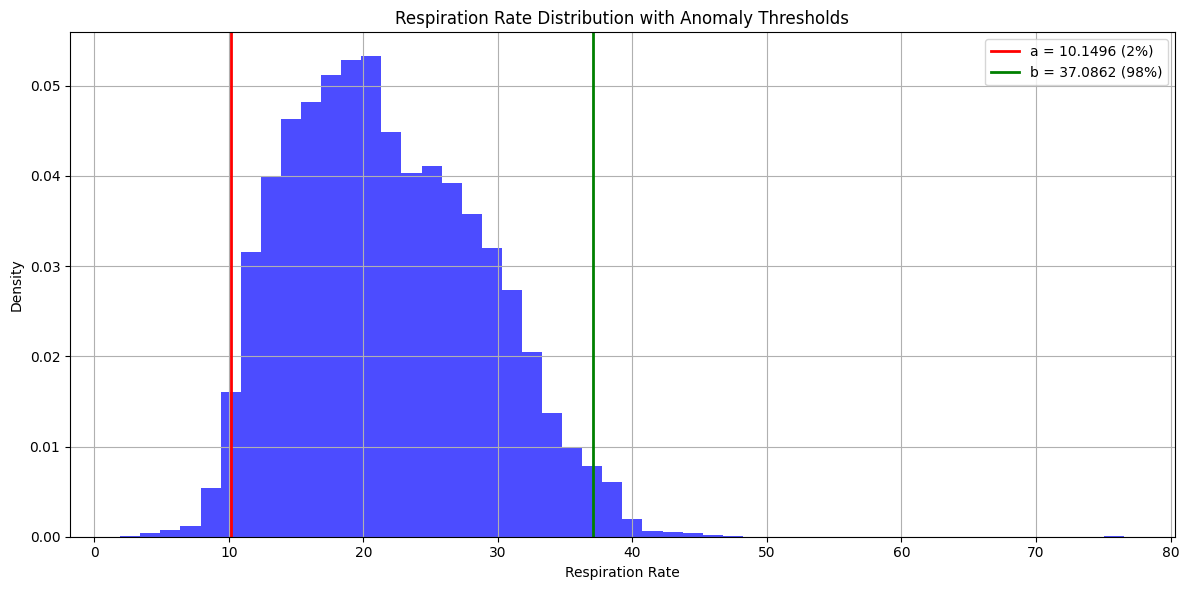

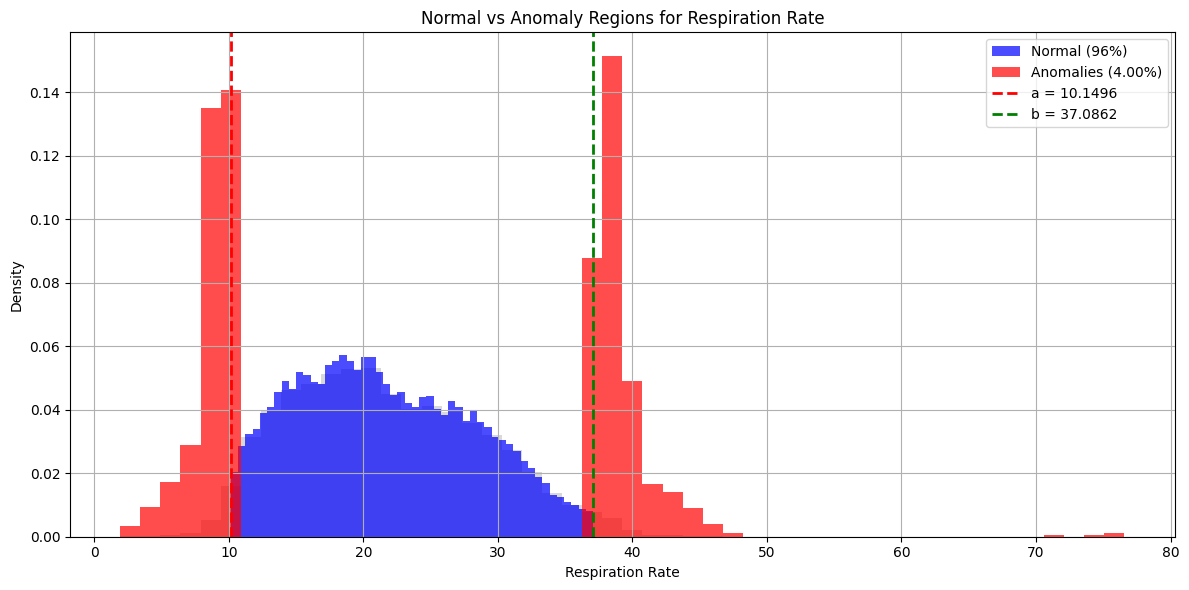


Task 1.1c Explanation:
1. We calculated the threshold values a and b such that P(X ≤ a) ≤ 0.02 and P(X ≤ b) ≥ 0.98
2. Using the percentile method, we found:
   - a (lower threshold) = 10.1496
   - b (upper threshold) = 37.0862
3. This creates a range where 96% of normal respiration rate values fall
4. Values outside this range (< a or > b) would be flagged as potential anomalies
5. The visualization shows the CDF with marked thresholds and a histogram showing
   the normal range vs anomaly regions



In [ ]:


# Finding threshold values for anomaly detection
# We'll use the percentile approach for more accurate results

# get the 30,000 sample points from resp data
sample = resp[:30000]

# calculate cdf from sorted sample
sorted_sample = np.sort(sample)
cdf = np.arange(1, len(sorted_sample) + 1) / len(sorted_sample)

# Calculate threshold values using percentiles.
# take middle 96% by taking of 2% from each end
a = np.percentile(sample, 2)  # 2nd percentile
b = np.percentile(sample, 98)  # 98th percentile

# Print results
print(f"Threshold values for anomaly detection (96% confidence interval):")
print(f"a (lower threshold, 2nd percentile): {a:.4f}")
print(f"b (upper threshold, 98th percentile): {b:.4f}")

# Calculate percentage of samples that would be flagged as anomalies (outside our confidence interval)
anomaly_count = np.sum((sample < a) | (sample > b))
anomaly_percentage = (anomaly_count / len(sample)) * 100
print(f"Percentage of samples outside thresholds: {anomaly_percentage:.2f}%")

# visualize the thresholds on the CDF
plt.figure(figsize=(12, 6))
plt.plot(sorted_sample, cdf, linewidth=2)
plt.axhline(y=0.02, color='r', linestyle='--', alpha=0.7, label='P(X ≤ a) = 0.02')
plt.axhline(y=0.98, color='g', linestyle='--', alpha=0.7, label='P(X ≤ b) = 0.98')
plt.axvline(x=a, color='r', linestyle='-', alpha=0.7, label=f'a = {a:.4f}')
plt.axvline(x=b, color='g', linestyle='-', alpha=0.7, label=f'b = {b:.4f}')
plt.grid(True)
plt.title('Empirical CDF with Threshold Values (96% CI)')
plt.xlabel('Respiration Rate')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.tight_layout()
plt.show()

# construct a histogram with thresholds to visualize the distribution
plt.figure(figsize=(12, 6))
plt.hist(sample, bins=50, density=True, alpha=0.7, color='blue')
plt.axvline(x=a, color='r', linestyle='-', linewidth=2, label=f'a = {a:.4f} (2%)')
plt.axvline(x=b, color='g', linestyle='-', linewidth=2, label=f'b = {b:.4f} (98%)')
plt.title('Respiration Rate Distribution with Anomaly Thresholds')
plt.xlabel('Respiration Rate')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# highlight the region between thresholds (normal region)
plt.figure(figsize=(12, 6))
plt.hist(sample, bins=50, density=True, alpha=0.3, color='gray')

# plot the histogram data between a and b with a different color
mask = (sample >= a) & (sample <= b)
plt.hist(sample[mask], bins=50, density=True, alpha=0.7, color='blue', label='Normal (96%)')

# plot the outliers
mask_outliers = (sample < a) | (sample > b)
plt.hist(sample[mask_outliers], bins=50, density=True, alpha=0.7, color='red', label=f'Anomalies ({anomaly_percentage:.2f}%)')

plt.axvline(x=a, color='r', linestyle='--', linewidth=2, label=f'a = {a:.4f}')
plt.axvline(x=b, color='g', linestyle='--', linewidth=2, label=f'b = {b:.4f}')
plt.title('Normal vs Anomaly Regions for Respiration Rate')
plt.xlabel('Respiration Rate')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### ML and MAP Decision Rules for Signal Detection

Mean of RESP: 21.741817712196767
Standard Deviation of RESP: 7.104173828181246


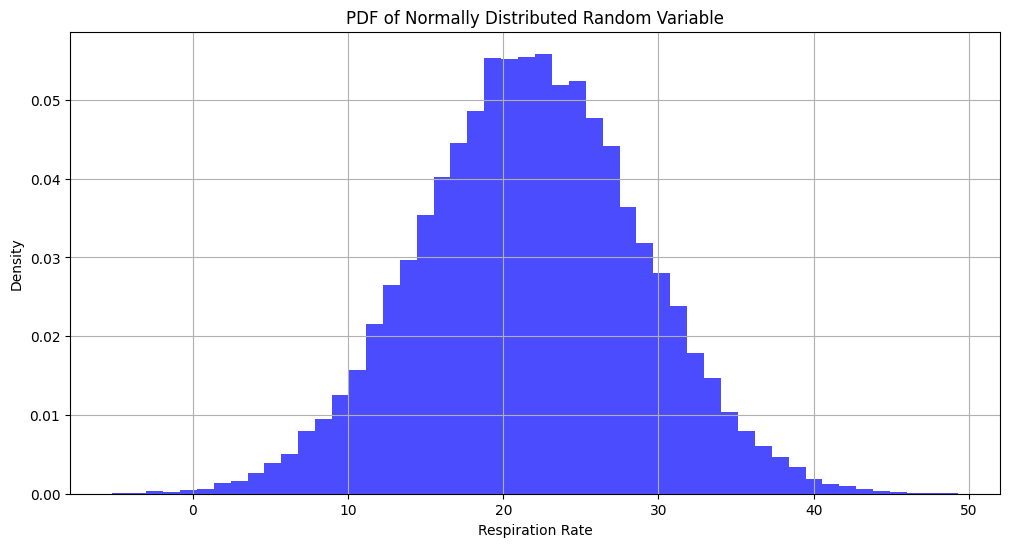

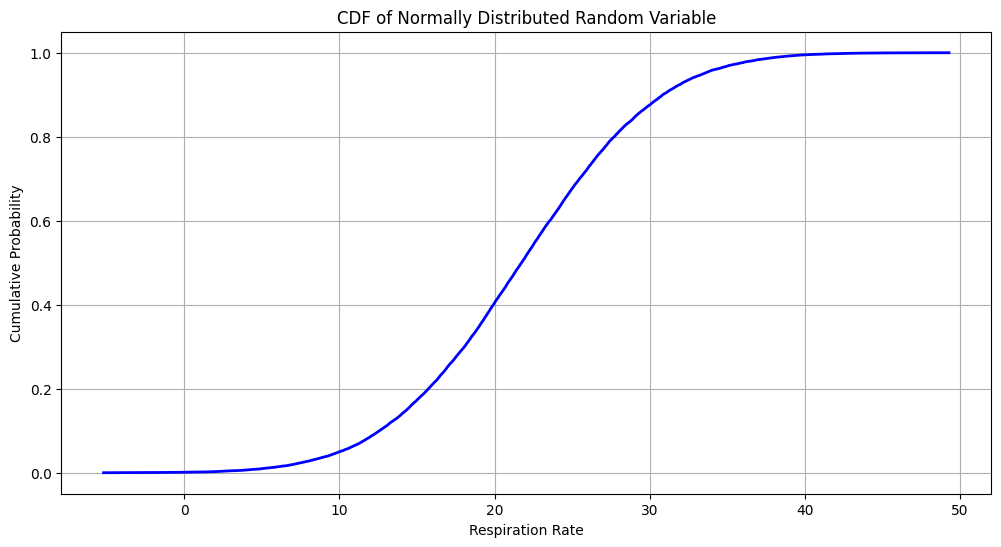

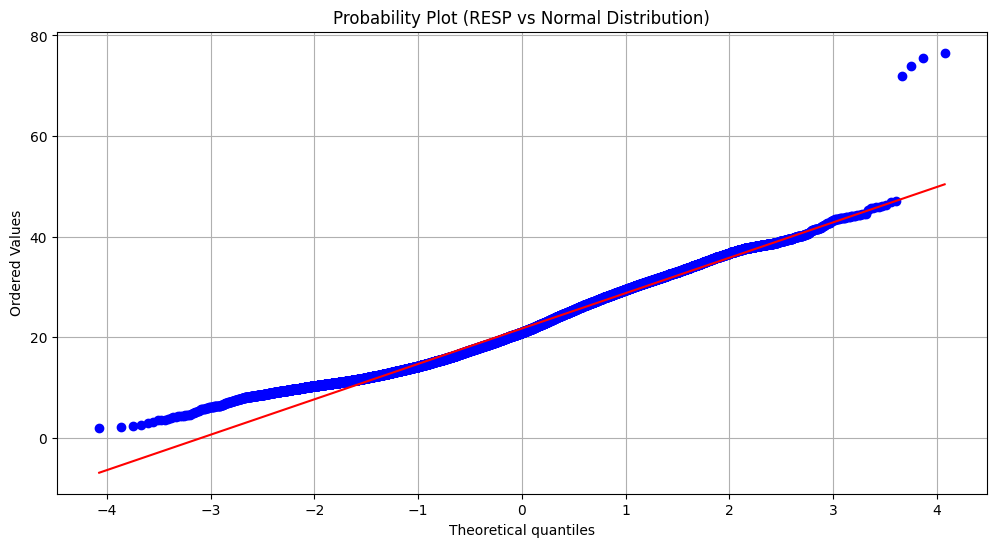


Differences observed between Task 1.1 (empirical) and Task 1.2 (normal) distributions:

1. The probability plot shows how closely the RESP data follows a normal distribution:
   - If points fall on the red line: perfect normal distribution
   - the deviations indicate departures from normality

2. Important differences we observed:
   - Left tail behavior - low values are more frequent than normal
   - Right tail behavior - high values are less frequent than normal
   - Middle section - the peak may be slightly more flat than normal

3. Quantitative measures:
   - Skewness - the tails extend relatively equally when comparing both
   - Kurtosis - the right tail is slightly than usual, with outliers far from the
   mean and stretching the range of values to the right. However, each outlier
   does not have a high frequency

The greater the deviation from the red line, the more non-normal the data is.

Skewness: 0.3917 (0 = symmetrical, >0 = right-skewed, <0 = left-skewed)
Kurtosis: -0.1

In [ ]:

# part a ()
resp_mean = np.mean(resp)
print(f"Mean of RESP: {resp_mean}")
resp_std = np.std(resp)
print(f"Standard Deviation of RESP: {resp_std}")

#part b ()
#Generate normal distribution and plot PDF/CDF

# Using the mean and std
normal_samples = np.random.normal(loc=resp_mean, scale=resp_std, size=30000)

# Plot PDF (histogram)
plt.figure(figsize=(12, 6))
counts, bins, _ = plt.hist(normal_samples, bins=50, density=True, alpha=0.7, color='blue', label='PDF')
plt.title('PDF of Normally Distributed Random Variable')
plt.xlabel('Respiration Rate')
plt.ylabel('Density')
plt.grid(True)

# Plot CDF
sorted_normal = np.sort(normal_samples)
cdf_normal = np.arange(1, len(sorted_normal)+1)/len(sorted_normal)

plt.figure(figsize=(12, 6))
plt.plot(sorted_normal, cdf_normal, linewidth=2, color='blue', label='CDF')
plt.title('CDF of Normally Distributed Random Variable')
plt.xlabel('Respiration Rate')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.show()

#part c ()
plt.figure(figsize=(12, 6))
stats.probplot(resp[:30000], dist="norm", plot=plt)
plt.title('Probability Plot (RESP vs Normal Distribution)')
plt.grid(True)
plt.show()

# Interpretation of differences
c_interpretation = """
Differences observed between empirical and normal distributions:

1. The probability plot shows how closely the RESP data follows a normal distribution:
   - If points fall on the red line: perfect normal distribution
   - the deviations indicate departures from normality

2. Important differences we observed:
   - Left tail behavior - low values are more frequent than normal
   - Right tail behavior - high values are less frequent than normal
   - Middle section - the peak may be slightly more flat than normal

3. Quantitative measures:
   - Skewness - the tails extend relatively equally when comparing both
   - Kurtosis - the right tail is slightly than usual, with outliers far from the
   mean and stretching the range of values to the right. However, each outlier
   does not have a high frequency

The greater the deviation from the red line, the more non-normal the data is.
"""
print(c_interpretation)

# Calculate skewness and kurtosis for quantitative comparison
skewness = stats.skew(resp[:30000])
kurtosis = stats.kurtosis(resp[:30000])

print(f"Skewness: {skewness:.4f} (0 = symmetrical, >0 = right-skewed, <0 = left-skewed)")
print(f"Kurtosis: {kurtosis:.4f} (3 = normal, >3 = heavier tails, <3 = lighter tails)")

#part d ()

# Equation for normal PDF
pdf_eq = "f(x) = (1)/(σ√(2π)) e^(-0.5((x-μ)/σ)^2)"

# Equation for normal CDF (no closed form, but represented as)
cdf_eq = "F(x) = 1/2[1 + erf((x-μ)/(σ√2))]"

print("Normal Distribution PDF Equation:")
print(pdf_eq)
print("\nNormal Distribution CDF Equation:")
print(cdf_eq)

# Calculate theoretical thresholds using percent points function (inverse CDF)
a_theoretical = stats.norm.ppf(0.02, loc=resp_mean, scale=resp_std)
b_theoretical = stats.norm.ppf(0.98, loc=resp_mean, scale=resp_std)

print("\nTheoretical Thresholds (assuming normal distribution):")
print(f"a (P(X ≤ a) ≤ 0.02): {a_theoretical:.4f}")
print(f"b (P(X ≤ b) ≥ 0.98): {b_theoretical:.4f}")

# Compare with empirical thresholds
a_empirical = np.percentile(resp[:30000], 2)
b_empirical = np.percentile(resp[:30000], 98)

print("\nComparison with Empirical Thresholds")
print(f"Empirical a: {a_empirical:.4f} vs Theoretical a: {a_theoretical:.4f}")
print(f"Empirical b: {b_empirical:.4f} vs Theoretical b: {b_theoretical:.4f}")

### ML and MAP Decision Rules for Signal Detection

### Alarm Generation from Signal Thresholds

HR Alarm:
Thresholds: a = 80.17428785898967, b = 98.5208527883117
Total alarms: 1200

PR Alarm Summary:
Thresholds: a = 79.01266140123865, b = 97.07281448248297
Total alarms: 1200

RESP Alarm Summary:
Thresholds: a = 10.149609779444026, b = 37.08615333276178
Total alarms: 1200

Coalesced HR alarms (length 3000):
[0 1 0 ... 0 0 0]

Coalesced PR alarms (length 3000):
[0 0 0 ... 0 0 0]

Coalesced RESP alarms (length 3000):
[0 0 0 ... 1 1 0]

Majority Voter Output (length 3000):
[0 0 0 ... 0 0 0]
Total Majority Alarms: 88


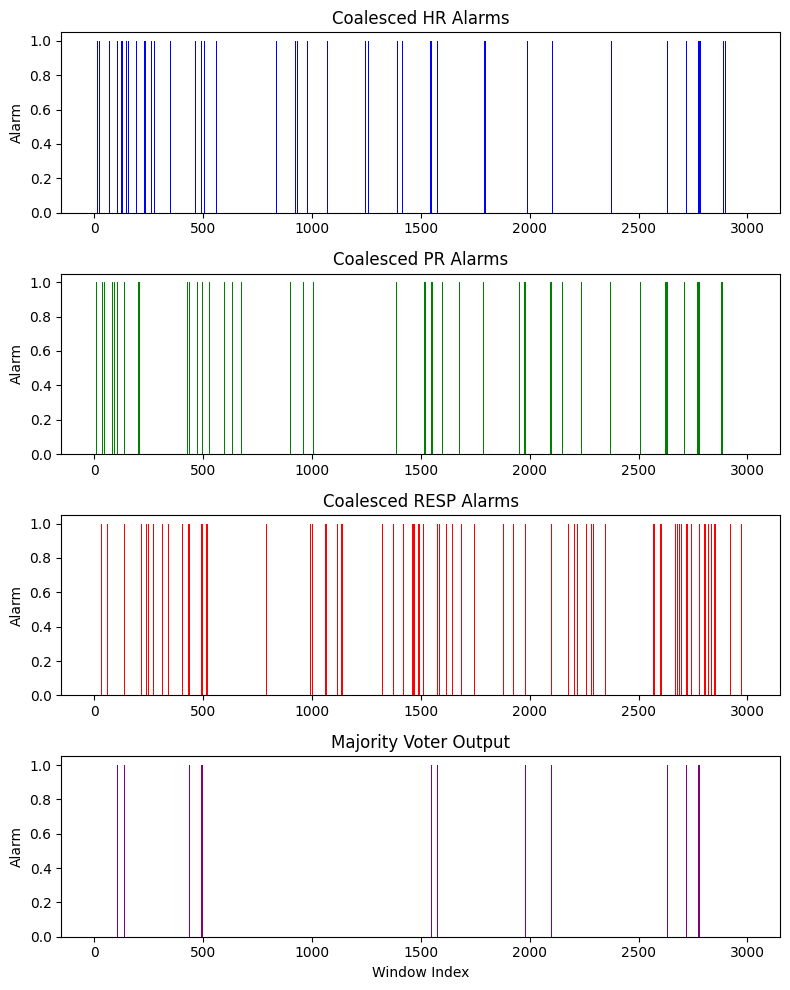

In [ ]:

def generate_alarms(signal,a,b):
    result=[]
    for i in signal:
        if ((i<a) or (i>b)):
            result.append(1)
        else:
            result.append(0)
    return np.array(result)



# get the 30,000 sample points from resp data
sample_resp = resp[:30000]
sample_hr = hr[:30000]
sample_pr = pr[:30000]


# take middle 96% by taking of 2% from each end
a_resp = np.percentile(sample_resp, 2)  # 2nd percentile
b_resp = np.percentile(sample_resp, 98)  # 98th percentile

a_hr = np.percentile(sample_hr, 2)  # 2nd percentile
b_hr = np.percentile(sample_hr, 98)  # 98th percentile

a_pr = np.percentile(sample_pr, 2)  # 2nd percentile
b_pr = np.percentile(sample_pr, 98)  # 98th percentile


# Generating alarms
al_hr = generate_alarms(hr,a_hr,b_hr)
al_pr = generate_alarms(pr,a_pr,b_pr)
al_resp = generate_alarms(resp,a_resp,b_resp)


#printing outputs
print("HR Alarm:")
print(f"Thresholds: a = {a_hr}, b = {b_hr}")
print(f"Total alarms: {np.sum(al_hr)}")

print("\nPR Alarm Summary:")#creating a new line
print(f"Thresholds: a = {a_pr}, b = {b_pr}")
print(f"Total alarms: {np.sum(al_pr)}")

print("\nRESP Alarm Summary:")#creating a new line
print(f"Thresholds: a = {a_resp}, b = {b_resp}")
print(f"Total alarms: {np.sum(al_resp)}")

def coalesce_alarms(alarm_vector, window_size=10):
    coalesced = []  # List to store the coalesced alarms
    for i in range(0, len(alarm_vector), window_size):
        window = alarm_vector[i:i + window_size]
        # If any value in the window is 1, set the coalesced alarm to 1.
        coalesced.append(1 if any(window) else 0)
    return np.array(coalesced)

# Apply the coalescing function to each alarm vector
coalesced_hr = coalesce_alarms(al_hr)
coalesced_pr = coalesce_alarms(al_pr)
coalesced_resp = coalesce_alarms(al_resp)

# Display the lengths and a summary of coalesced alarms
print("\nCoalesced HR alarms (length {}):".format(len(coalesced_hr)))
print(coalesced_hr)

print("\nCoalesced PR alarms (length {}):".format(len(coalesced_pr)))
print(coalesced_pr)

print("\nCoalesced RESP alarms (length {}):".format(len(coalesced_resp)))
print(coalesced_resp)

def majority_voter(hr_coal, pr_coal, resp_coal):
    """
    Given three coalesced alarms (HR, PR, and RESP), each as a numpy array of 0s and 1s,
    returns a new array where each element is 1 if at least two of the three inputs are 1.
    """
    # Sum the alarms window-by-window
    vote_sum = hr_coal + pr_coal + resp_coal
    # Mark as 1 if at least 2 out of 3 are 1
    return (vote_sum >= 2).astype(int)

# Apply majority voting
majority_alarms = majority_voter(coalesced_hr, coalesced_pr, coalesced_resp)

# Print a quick summary
print("\nMajority Voter Output (length {}):".format(len(majority_alarms)))
print(majority_alarms)
print(f"Total Majority Alarms: {np.sum(majority_alarms)}")

# Plotting each coalesced alarm and the majority output using bar charts

# Create an array of indices, one per 10-sample window
window_indices = np.arange(len(coalesced_hr))

plt.figure(figsize=(8, 10))

# (1) Coalesced HR Alarms
plt.subplot(4, 1, 1)
plt.bar(window_indices, coalesced_hr, color='blue')
plt.title("Coalesced HR Alarms")
plt.ylabel("Alarm")

# (2) Coalesced PR Alarms
plt.subplot(4, 1, 2)
plt.bar(window_indices, coalesced_pr, color='green')
plt.title("Coalesced PR Alarms")
plt.ylabel("Alarm")

# (3) Coalesced RESP Alarms
plt.subplot(4, 1, 3)
plt.bar(window_indices, coalesced_resp, color='red')
plt.title("Coalesced RESP Alarms")
plt.ylabel("Alarm")

# (4) Majority Voter Output
plt.subplot(4, 1, 4)
plt.bar(window_indices, majority_alarms, color='purple')
plt.title("Majority Voter Output")
plt.xlabel("Window Index")
plt.ylabel("Alarm")

plt.tight_layout()
plt.show()


### ML and MAP Decision Rules for Signal Detection

### Alarm Generation from Signal Thresholds

In [ ]:
# P(False Alarm) = P(Voter raises an alarm | Physician indicates no abnormality)/ # number of intervals where golden =0
# P(Miss Detection) = P(Voter raises no alarms | Physician indicates an abnormality)/# number of intervals where golden =1

voter_output = majority_alarms

no_abnormal = golden_alarms == 0
abnormality = golden_alarms == 1

# False alarms
false_alarms = np.sum((voter_output == 1) & no_abnormal)

# Miss detections
misses = np.sum((voter_output == 0) & abnormality)

# Denominators
total_1 = np.sum(no_abnormal)
total_2 = np.sum(abnormality)

# Conditional probabilities

  # False Alarm Probability
if total_1 > 0:
    p_false_alarm = false_alarms / total_1
else:
    p_false_alarm = 0

# Miss Detection Probability
if total_2 > 0:
    p_miss_detection = misses / total_2
else:
    p_miss_detection = 0

# Print results
print(f"False Alarms: {false_alarms} out of {total_1}")
print(f"P(False Alarm) = {p_false_alarm}")

print(f"Miss Detections: {misses} out of {total_2}")
print(f"P(Miss Detection) = {p_miss_detection}")

# Calculate the probability of error

# Total number of intervals (i.e., the length of the golden alarms vector)
total_intervals = 3000

# The total number of error events is the sum of false alarms and miss detections.
errors = false_alarms + misses

# Calculate the probability of error.
p_error = errors / total_intervals

# Print the results
print(f"Total Errors: {errors} out of {total_intervals} intervals")
print(f"P(Error) = {p_error}")

# Theoretical (Gaussian) thresholds + Δ-percent summary

from scipy.stats import norm

golden_alarms = golden_alarms.ravel()        # (3000,) not (1,3000)
mask_normal   = (golden_alarms == 0)
mask_abn      = ~mask_normal                 # same as (golden_alarms == 1)
N0, N1        = mask_normal.sum(), mask_abn.sum()

z96 = norm.ppf(0.98)                         # 2.0537  →  96 % interval

def gaussian_bounds(sig, z=z96):
    mu, sigma = sig.mean(), sig.std(ddof=1)  # unbiased σ
    return mu - z*sigma, mu + z*sigma

# --- 1.  Compute the Gaussian cut-offs  ---------------------------
a_hr,   b_hr   = gaussian_bounds(hr)
a_pr,   b_pr   = gaussian_bounds(pr)
a_resp, b_resp = gaussian_bounds(resp)

print("\n--- Theoretical cut-offs (μ ± 2.05 σ) ---")
print(f"HR   : {a_hr:.2f} … {b_hr:.2f}")
print(f"PR   : {a_pr:.2f} … {b_pr:.2f}")
print(f"RESP : {a_resp:.2f} … {b_resp:.2f}")

# --- 2.  Generate alarms ➜ coalesce ➜ majority vote ---------------
alarms_hr_t   = generate_alarms(hr,   a_hr,   b_hr)
alarms_pr_t   = generate_alarms(pr,   a_pr,   b_pr)
alarms_resp_t = generate_alarms(resp, a_resp, b_resp)

co_hr_t   = coalesce_alarms(alarms_hr_t)
co_pr_t   = coalesce_alarms(alarms_pr_t)
co_resp_t = coalesce_alarms(alarms_resp_t)

majority_t = majority_voter(co_hr_t, co_pr_t, co_resp_t)

# --- 3.  Performance metrics --------------------------------------
fa_t   = ((majority_t == 1) & mask_normal).sum()
miss_t = ((majority_t == 0) & mask_abn).sum()

p_false_alarm_theor    = fa_t   / N0
p_miss_detection_theor = miss_t / N1
p_error_theor          = (fa_t + miss_t) / golden_alarms.size

print("\n--- Theoretical performance ---")
print(f"P(False Alarm) = {p_false_alarm_theor:.4f}")
print(f"P(Miss)        = {p_miss_detection_theor:.4f}")
print(f"P(Error)       = {p_error_theor:.4f}")

# --- 4.  Δ-percent vs. your empirical numbers ---------------------
pct = lambda theor, emp: (theor - emp)/theor * 100 if theor else 0

delta_FA   = pct(p_false_alarm_theor,    p_false_alarm)
delta_Miss = pct(p_miss_detection_theor, p_miss_detection)
delta_Err  = pct(p_error_theor,          p_error)

print("\n--- Δ (empirical vs theoretical) ---")
print(f"False Alarm Δ = {delta_FA:+.1f}%")
print(f"Miss Δ        = {delta_Miss:+.1f}%")
print(f"Overall Err Δ = {delta_Err:+.1f}%")


d_interpretation = f"""
Empirical vs. Theoretical Thresholds

Differences in Results

1) Miss Detection Rate
    • Theoretical thresholds (like mean ± 2σ) can be either more lenient or stricter than empirical ones, such as the 2nd and 98th percentiles.
    • If the theoretical range is too broad, values that should raise alarms might still be classified as “normal,” which increases the chance of missing important detections.

2) False Alarm Rate
    • In real-world data, the assumption of a normal distribution doesn’t always hold. So, using mean ± 2σ may not be as effective at identifying outliers as percentile-based thresholds.
    • Depending on how the data is distributed—like if it’s skewed or has heavier tails—this could lead to more or fewer false alarms compared to using empirical cutoffs.

3) Overall Error Probability
    • The total error (false alarms plus missed detections) depends on how well the chosen thresholds reflect the actual data behavior.
    • If the data isn't normally distributed, theoretical thresholds could misrepresent what's truly "out of range," leading to higher error. Empirical thresholds might better capture the actual variation.

Lessons Learned

1) Real Data Isn't Always Ideal
    • The normal distribution is a useful model, but it doesn’t always reflect reality. Data can be skewed, have outliers, or show irregular patterns, so empirical percentiles might be a better fit when that’s the case.

2) Balancing Accuracy and Practicality
    • There’s always a trade-off: loose thresholds risk missing real events, while strict ones cause more false alarms. The best approach considers the shape of the data and the cost of missing events versus flagging too many.

3) Don’t Rely Solely on Theory
    • It’s important to test theoretical assumptions against actual data. If they don’t match, using empirical data to adjust thresholds can improve performance. Often, it’s most effective to start with theory and refine using observations from real data.
"""

print(d_interpretation)


False Alarms: 70 out of 2981
P(False Alarm) = 0.023482053002348204
Miss Detections: 1 out of 19
P(Miss Detection) = 0.05263157894736842
Total Errors: 71 out of 3000 intervals
P(Error) = 0.023666666666666666

--- Theoretical cut-offs (μ ± 2.05 σ) ---
HR   : 78.82 … 96.85
PR   : 78.14 … 96.11
RESP : 7.15 … 36.33

--- Theoretical performance ---
P(False Alarm) = 0.0161
P(Miss)        = 0.0526
P(Error)       = 0.0163

--- Δ (empirical vs theoretical) ---
False Alarm Δ = -45.8%
Miss Δ        = +0.0%
Overall Err Δ = -44.9%

2.2c: Empirical vs. Theoretical Thresholds

Differences in Results

1) Miss Detection Rate
    • Theoretical thresholds (like mean ± 2σ) can be either more lenient or stricter than empirical ones, such as the 2nd and 98th percentiles.
    • If the theoretical range is too broad, values that should raise alarms might still be classified as “normal,” which increases the chance of missing important detections.

2) False Alarm Rate
    • In real-world data, the assumption of 

### Probability Mass Function Estimation

### Probability Mass Function Estimation

Saving 1_a41178.mat to 1_a41178.mat
Saving 2_a42126.mat to 2_a42126.mat
Saving 3_a40076.mat to 3_a40076.mat
Saving 4_a40050.mat to 4_a40050.mat
Saving 5_a41287.mat to 5_a41287.mat
Saving 6_a41846.mat to 6_a41846.mat
Saving 7_a41846.mat to 7_a41846.mat
Saving 8_a42008.mat to 8_a42008.mat
Saving 9_a41846.mat to 9_a41846.mat

Processing: 1_a41178.mat
P(H1) = 0.0265, P(H0) = 0.9735


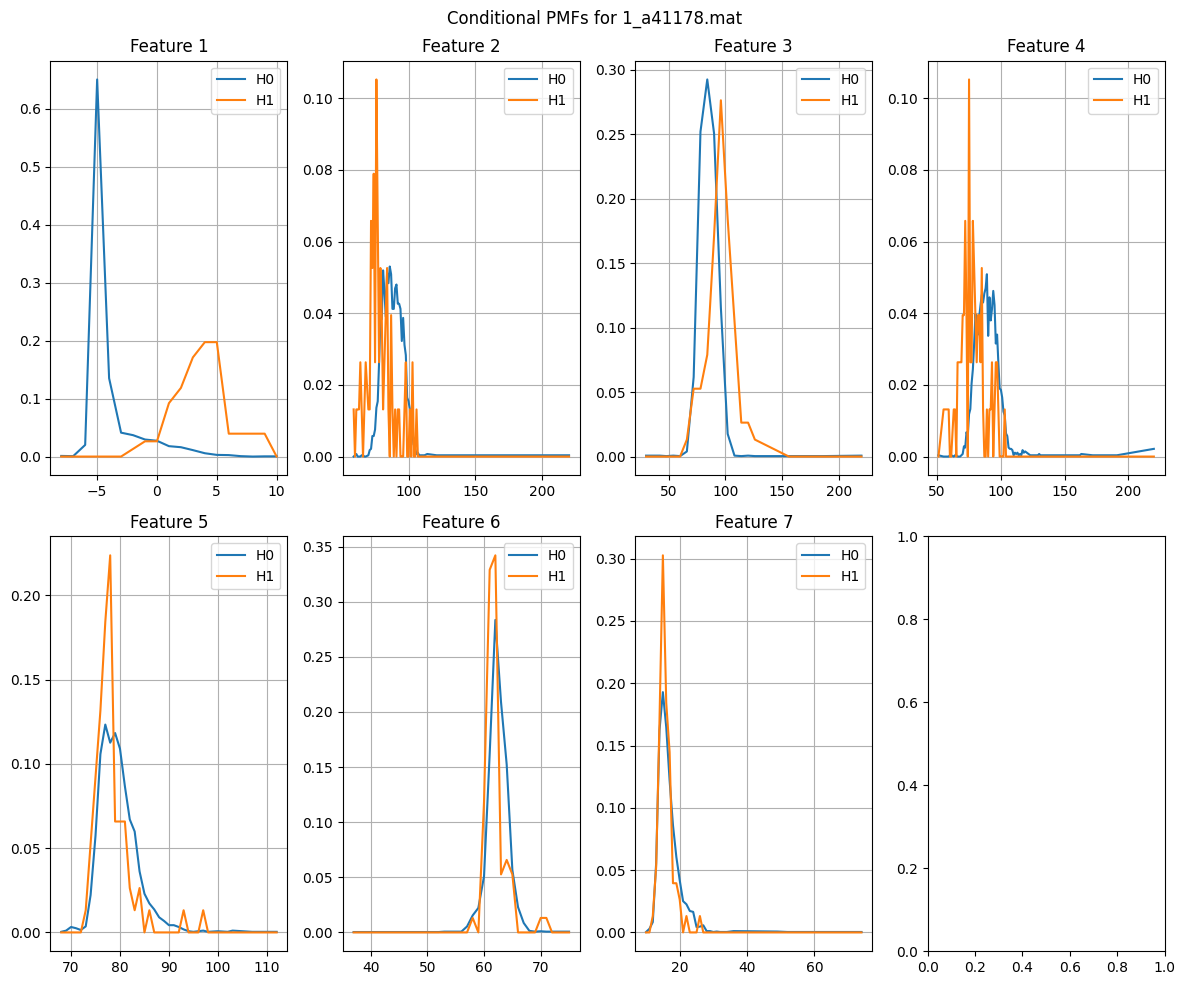


Processing: 2_a42126.mat
P(H1) = 0.0163, P(H0) = 0.9837


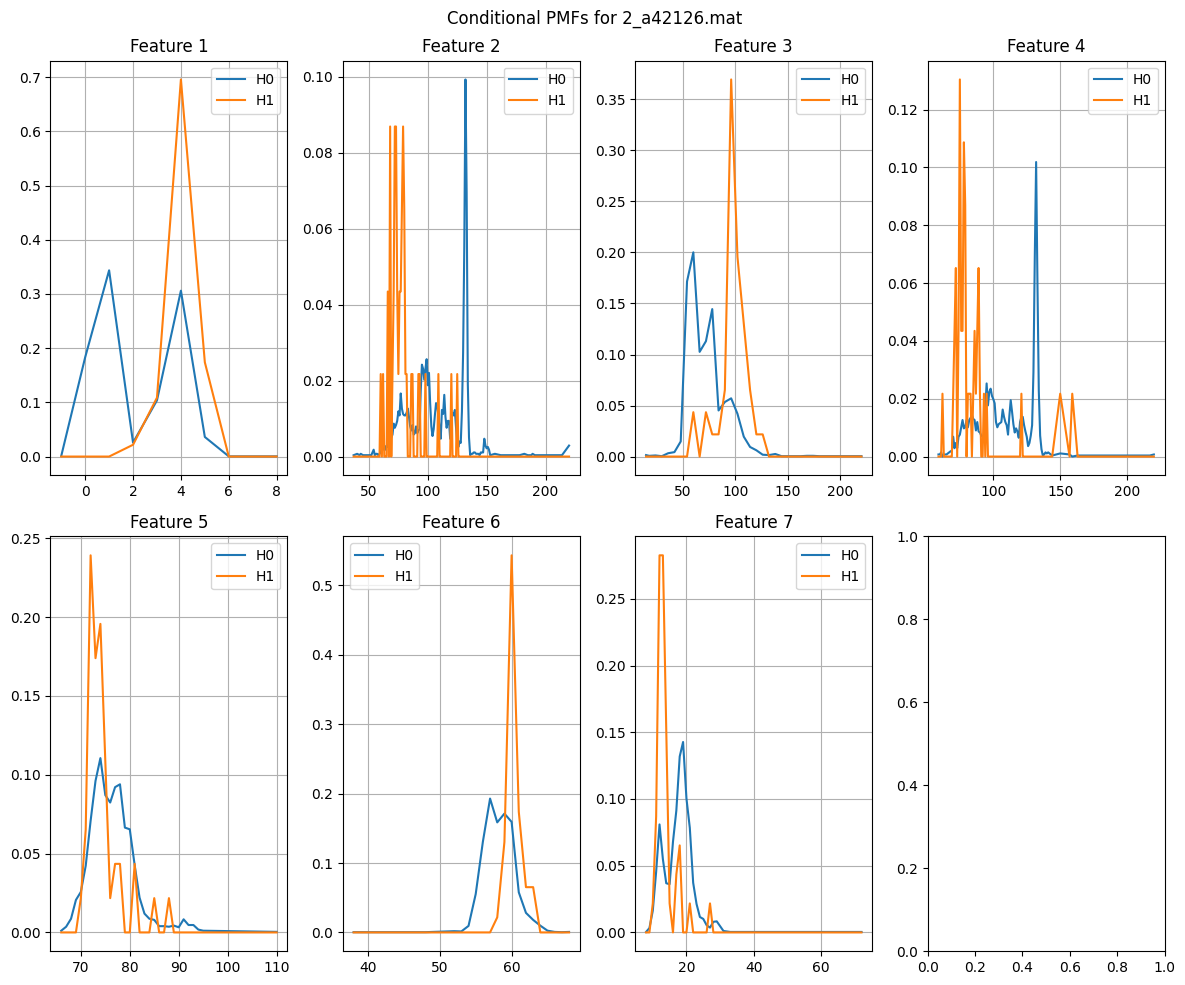


Processing: 3_a40076.mat
P(H1) = 0.0021, P(H0) = 0.9979


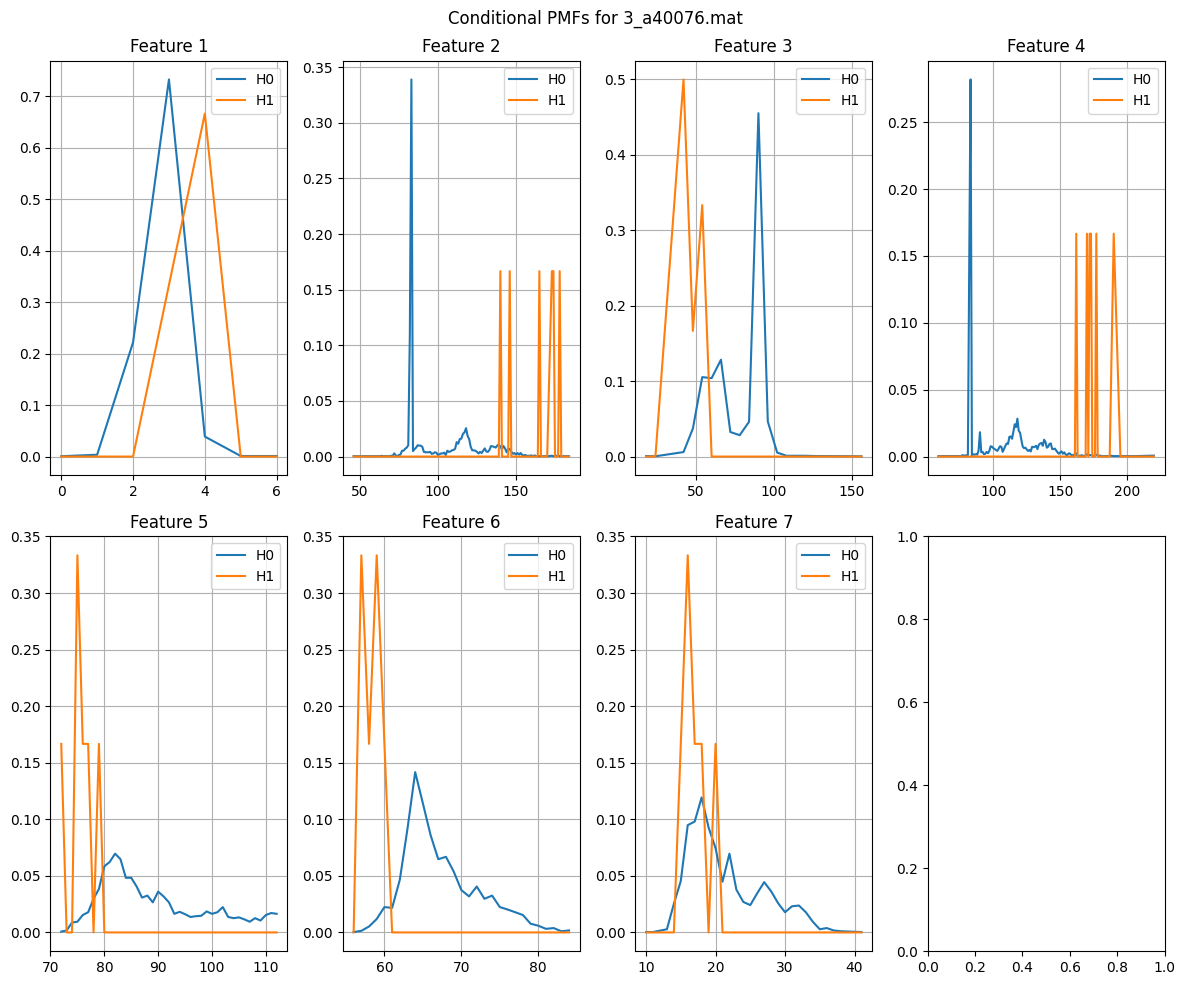


Processing: 4_a40050.mat
P(H1) = 0.0025, P(H0) = 0.9975


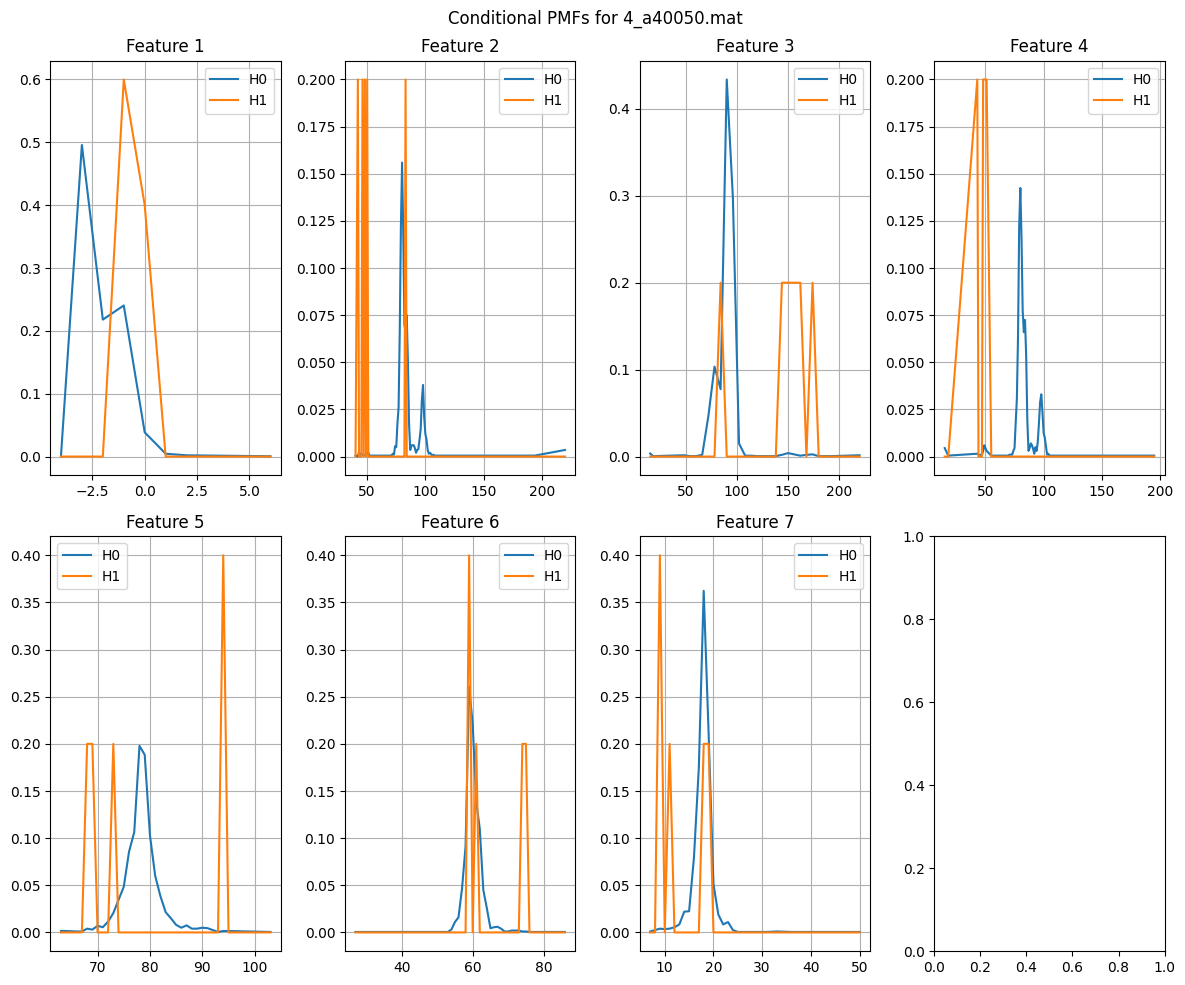


Processing: 5_a41287.mat
P(H1) = 0.0010, P(H0) = 0.9990


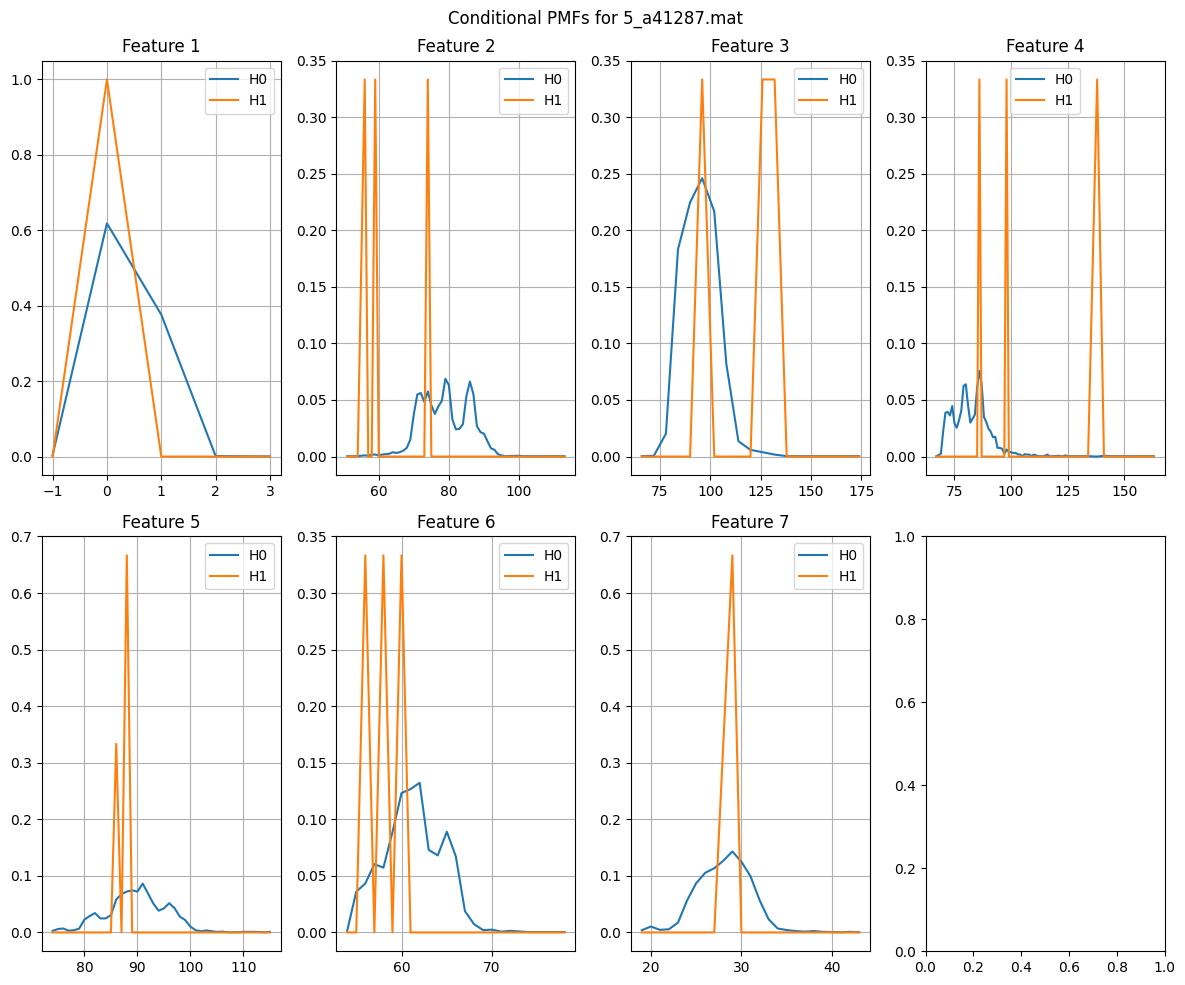


Processing: 6_a41846.mat
P(H1) = 0.0218, P(H0) = 0.9782


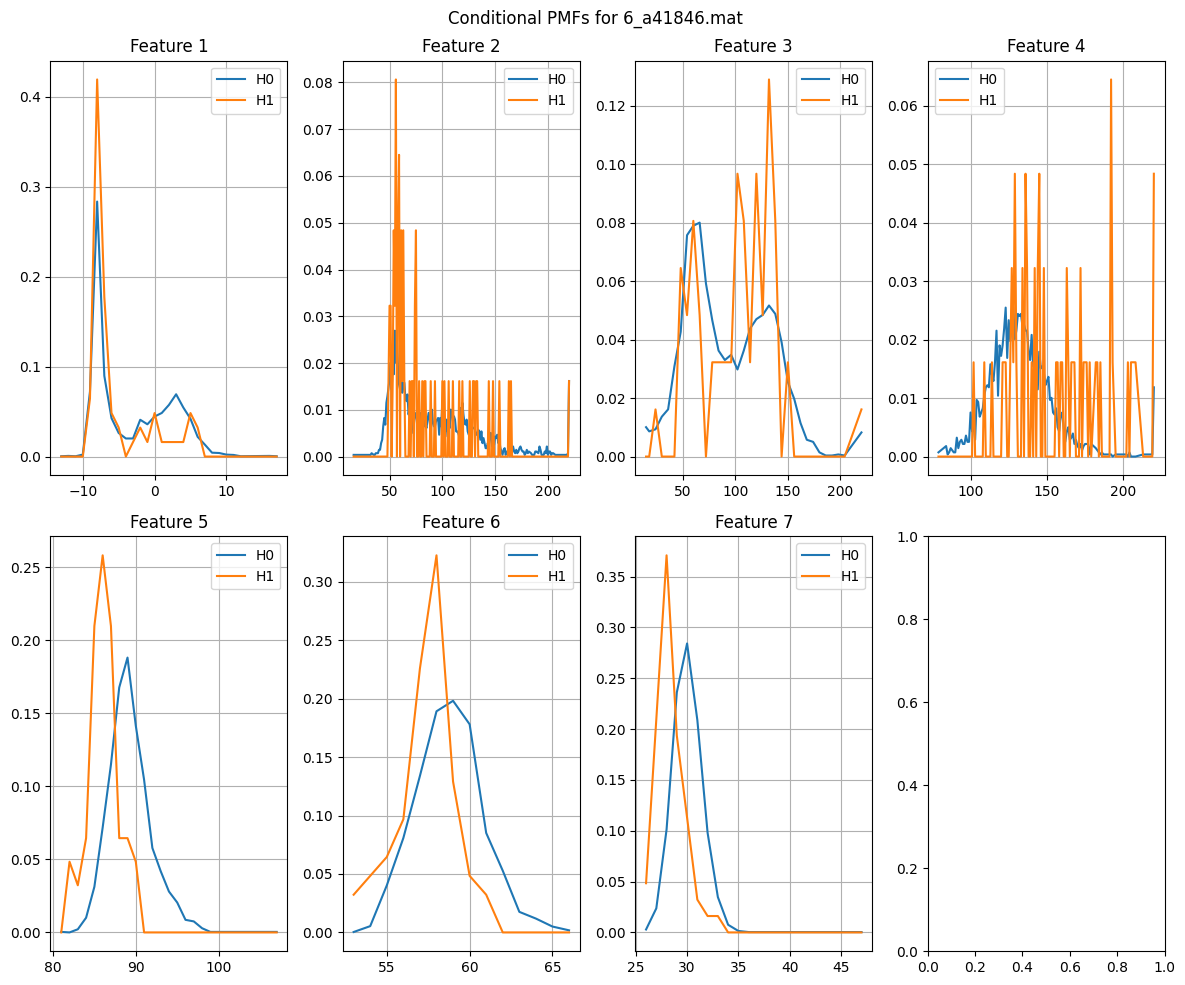


Processing: 7_a41846.mat
P(H1) = 0.0171, P(H0) = 0.9829


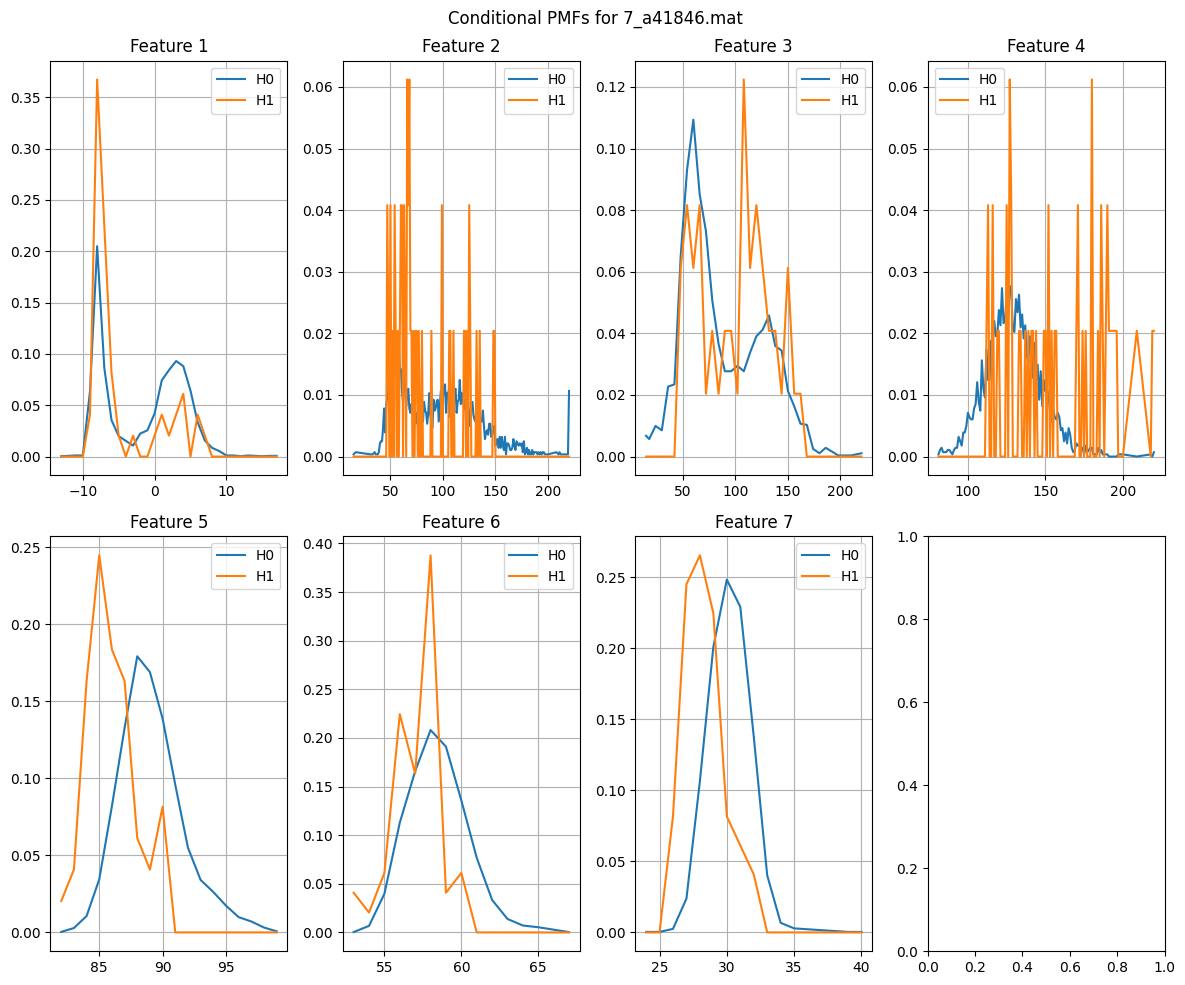


Processing: 8_a42008.mat
P(H1) = 0.0078, P(H0) = 0.9922


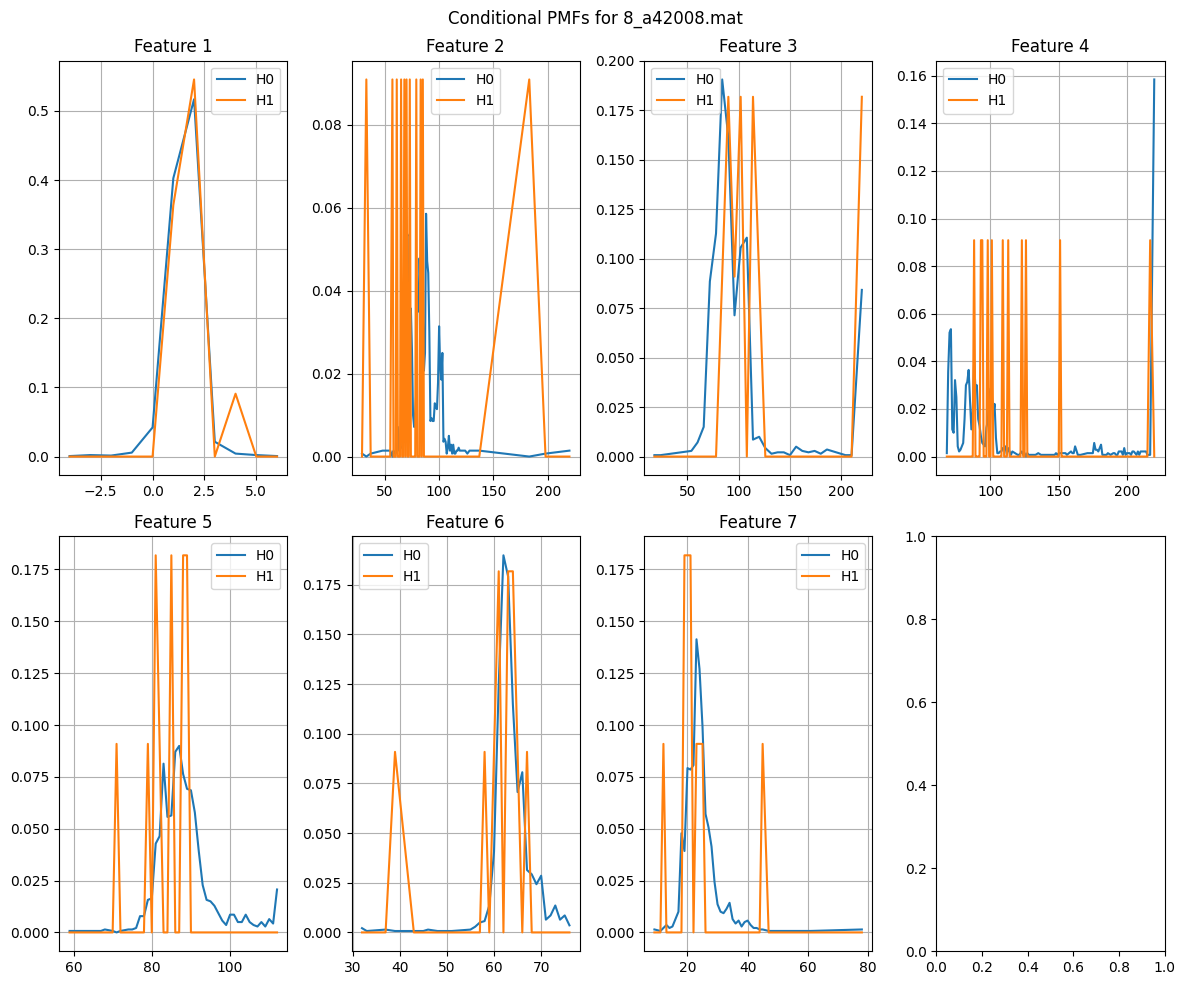


Processing: 9_a41846.mat
P(H1) = 0.0218, P(H0) = 0.9782


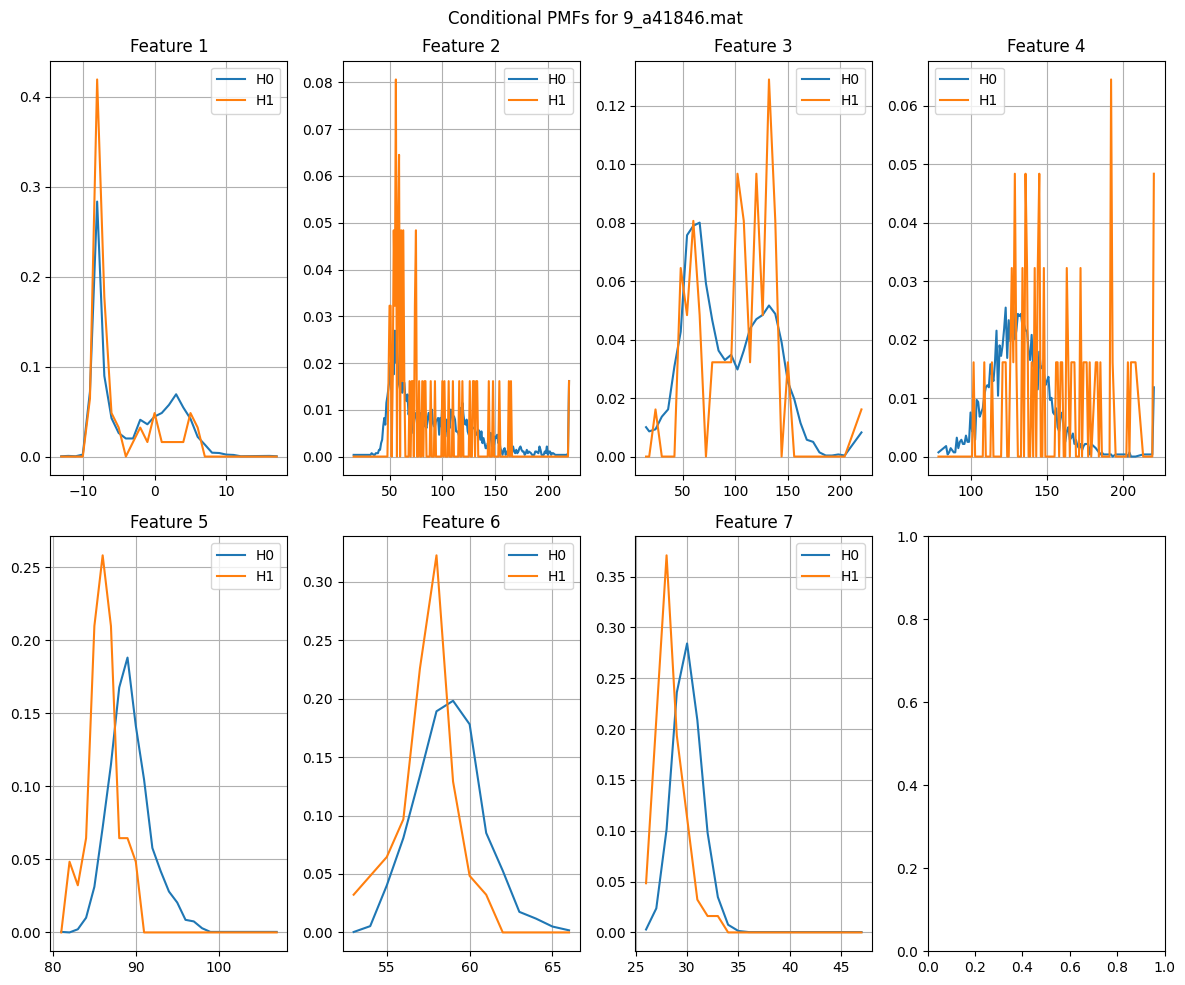


=== Patient 1 ===
Feature 1:
  ML  →  P_FA = 0.751, P_Miss = 0.690, P_Error = 0.750
  MAP →  P_FA = 0.000, P_Miss = 1.000, P_Error = 0.020
Feature 2:
  ML  →  P_FA = 0.209, P_Miss = 0.414, P_Error = 0.214
  MAP →  P_FA = 0.000, P_Miss = 1.000, P_Error = 0.020
Feature 3:
  ML  →  P_FA = 0.006, P_Miss = 0.828, P_Error = 0.023
  MAP →  P_FA = 0.000, P_Miss = 1.000, P_Error = 0.020
Feature 4:
  ML  →  P_FA = 0.070, P_Miss = 0.517, P_Error = 0.079
  MAP →  P_FA = 0.033, P_Miss = 0.517, P_Error = 0.043
Feature 5:
  ML  →  P_FA = 0.777, P_Miss = 0.310, P_Error = 0.768
  MAP →  P_FA = 0.385, P_Miss = 0.552, P_Error = 0.388
Feature 6:
  ML  →  P_FA = 0.105, P_Miss = 0.724, P_Error = 0.117
  MAP →  P_FA = 0.058, P_Miss = 0.724, P_Error = 0.071
Feature 7:
  ML  →  P_FA = 0.991, P_Miss = 0.000, P_Error = 0.971
  MAP →  P_FA = 0.971, P_Miss = 0.138, P_Error = 0.954

=== Patient 2 ===
Feature 1:
  ML  →  P_FA = 0.036, P_Miss = 0.400, P_Error = 0.038
  MAP →  P_FA = 0.000, P_Miss = 1.000, P_Error = 

In [ ]:
# • Assumes nine patient .mat files, each holding:
#       - all_data   : 7 × N integer feature matrix
#       - all_labels : length-N vector with binary ground truth (0 = H0, 1 = H1)
#  • We build:
#       - per-feature PMFs  P(X_f=x | Hk)
#       - ML and MAP rules (single features)
#       - performance tables on held-out data
#       - a brute-force search for best feature *pairs*
#       - an optional correlation filter for the pair search
#


# Imports
import numpy as np
import matplotlib.pyplot as plt

# helper libs
from IPython.display import Audio
from skimage.io import imread
from scipy import signal, stats
from scipy.io import wavfile, loadmat
from collections import defaultdict
from google.colab import files
import os

uploaded = files.upload()


# 2) PER-PATIENT PROCESSING (training split, PMFs, ML/MAP on training set)

for fname in uploaded:
    print(f"\nProcessing: {fname}")
    mat = loadmat(fname)

    # raw measurements (floored to ints) + ground-truth labels
    all_data   = np.floor(mat['all_data']).astype(int)   # 7 × N
    all_labels = mat['all_labels'].flatten()             # length N

    # TRAIN / TEST SPLIT
    N          = all_data.shape[1]
    split_idx  = int(2 * N / 3)          # first ⅔ → train
    train_data = all_data[:, :split_idx]
    test_data  = all_data[:, split_idx:]
    label_train = all_labels[:split_idx]
    label_test  = all_labels[split_idx:]

    #  PRIORS
    # Loop version (matches your original style)
    count_H1 = np.sum(label_train == 1)
    count_H0 = np.sum(label_train == 0)
    total    = len(label_train)

    P_H1 = count_H1 / total
    P_H0 = count_H0 / total
    print(f"P(H1) = {P_H1:.4f}, P(H0) = {P_H0:.4f}")

    #  LIKELIHOOD COUNTS
    likelihood_H1 = [{} for _ in range(7)]   # list of 7 dicts
    likelihood_H0 = [{} for _ in range(7)]

    for f in range(7):                       # feature index
        for i in range(split_idx):           # sample index (training only)
            x     = train_data[f, i]
            label = label_train[i]
            if label == 1:
                likelihood_H1[f][x] = likelihood_H1[f].get(x, 0) + 1
            else:
                likelihood_H0[f][x] = likelihood_H0[f].get(x, 0) + 1

    # Convert counts → probability mass functions
    pmf_H1 = [{} for _ in range(7)]
    pmf_H0 = [{} for _ in range(7)]

    for f in range(7):
        tot1   = sum(likelihood_H1[f].values())
        tot0   = sum(likelihood_H0[f].values())
        all_xs = set(likelihood_H1[f]) | set(likelihood_H0[f])
        for x in all_xs:
            pmf_H1[f][x] = likelihood_H1[f].get(x, 0) / tot1
            pmf_H0[f][x] = likelihood_H0[f].get(x, 0) / tot0

    #  PLOT PMFs
    fig, axes = plt.subplots(2, 4, figsize=(12, 10))
    axes      = axes.flatten()

    for f in range(7):
        x_vals = sorted(set(pmf_H1[f]) | set(pmf_H0[f]))
        y_H1   = [pmf_H1[f].get(x, 0) for x in x_vals]
        y_H0   = [pmf_H0[f].get(x, 0) for x in x_vals]

        axes[f].plot(x_vals, y_H0, label="H0")
        axes[f].plot(x_vals, y_H1, label="H1")
        axes[f].set_title(f"Feature {f + 1}")
        axes[f].grid(True)
        axes[f].legend()

    plt.suptitle(f"Conditional PMFs for {fname}")
    plt.tight_layout()
    plt.show()

    #  ML & MAP on TRAIN
    # We record a 7-bit decision vector per *training* sample.
    ML_vector  = []
    MAP_vector = []

    for i in range(split_idx):
        ml_bits  = []
        map_bits = []
        for f in range(7):
            x  = train_data[f, i]
            p1 = pmf_H1[f].get(x, 0)
            p0 = pmf_H0[f].get(x, 0)

            ml_bits.append(1 if p1 >= p0 else 0)
            map_bits.append(1 if p1 * P_H1 >= p0 * P_H0 else 0)

        ML_vector.append(ml_bits)
        MAP_vector.append(map_bits)

#
# Build per-feature HT lookup tables (value, P0, P1)
#
num_patients   = len(uploaded)         # expected: 9
HT_table_array = [[None] * 7 for _ in range(num_patients)]

for p_idx, fname in enumerate(uploaded):
    mat         = loadmat(fname)
    all_data    = np.floor(mat['all_data']).astype(int)
    all_labels  = mat['all_labels'].flatten()
    N           = all_data.shape[1]
    split_idx   = int(2 * N / 3)
    train_data  = all_data[:, :split_idx]
    label_train = all_labels[:split_idx]

    for f in range(7):
        x_vals  = sorted(set(pmf_H0[f]) | set(pmf_H1[f]))
        vals    = np.array(x_vals)
        row_H0  = np.array([pmf_H0[f].get(x, 0) for x in x_vals])
        row_H1  = np.array([pmf_H1[f].get(x, 0) for x in x_vals])
        HT_table_array[p_idx][f] = np.vstack([vals, row_H0, row_H1])

#
# Apply ML & MAP rules to the *test* split
#
ML_test_array  = [[None] * 7 for _ in range(num_patients)]
MAP_test_array = [[None] * 7 for _ in range(num_patients)]

for p_idx, fname in enumerate(uploaded):
    mat          = loadmat(fname)
    all_data     = np.floor(mat['all_data']).astype(int)
    all_labels   = mat['all_labels'].flatten()
    N            = all_data.shape[1]
    split_idx    = int(2 * N / 3)
    test_data    = all_data[:, split_idx:]
    label_train  = all_labels[:split_idx]

    # fresh priors (per patient)
    P_H1 = np.mean(label_train == 1)
    P_H0 = 1 - P_H1

    for f in range(7):
        HT      = HT_table_array[p_idx][f]
        x_vals  = HT[0].astype(int)
        p0_map  = dict(zip(x_vals, HT[1]))   # P(x|H0)
        p1_map  = dict(zip(x_vals, HT[2]))   # P(x|H1)

        ml_vec = [1 if p1_map.get(x, 0) >= p0_map.get(x, 0) else 0
                  for x in test_data[f]]
        map_vec = [1 if p1_map.get(x, 0) * P_H1 >=
                         p0_map.get(x, 0) * P_H0 else 0
                   for x in test_data[f]]

        ML_test_array[p_idx][f]  = np.array(ml_vec)
        MAP_test_array[p_idx][f] = np.array(map_vec)

#
# Compute P_FA, P_Miss, P_Error for each feature & patient
#
Error_table_array = [[None] * 7 for _ in range(num_patients)]

for p_idx, fname in enumerate(uploaded):
    mat         = loadmat(fname)
    all_labels  = mat['all_labels'].flatten()
    N           = all_labels.shape[0]
    split_idx   = int(2 * N / 3)
    label_test  = all_labels[split_idx:].astype(int)

    for f in range(7):
        ml_dec = ML_test_array[p_idx][f]
        map_dec = MAP_test_array[p_idx][f]

        denom0 = np.sum(label_test == 0)  # avoid divide-by-zero
        denom1 = np.sum(label_test == 1)

        metrics = np.zeros((2, 3))        # rows → [ML, MAP]

        for row, dec in enumerate((ml_dec, map_dec)):
            fa  = np.sum((dec == 1) & (label_test == 0)) / denom0 if denom0 > 0 else np.nan
            md  = np.sum((dec == 0) & (label_test == 1)) / denom1 if denom1 > 0 else np.nan
            err = np.mean(dec != label_test)
            metrics[row] = [fa, md, err]

        Error_table_array[p_idx][f] = metrics

#  print the entire 9 × 7 error table
for p_idx, patient_errors in enumerate(Error_table_array):
    print(f"\n=== Patient {p_idx + 1} ===")
    for f_idx, metrics in enumerate(patient_errors):
        ml_fa,  ml_miss,  ml_err  = metrics[0]
        map_fa, map_miss, map_err = metrics[1]
        print(f"Feature {f_idx + 1}:")
        print(f"  ML  →  P_FA = {ml_fa:.3f}, P_Miss = {ml_miss:.3f}, P_E = {ml_err:.3f}")
        print(f"  MAP → P_FA = {map_fa:.3f}, P_Miss = {map_miss:.3f}, P_E = {map_err:.3f}")


# Search for the best pair of features (no correlation filter)

file_list          = list(uploaded.keys())
best_feature_pairs = []

for fname in file_list:
    mat         = loadmat(fname)
    all_data    = np.floor(mat['all_data']).astype(int)
    all_labels  = mat['all_labels'].flatten()
    N           = all_data.shape[1]
    split_idx   = int(2 * N / 3)
    train_data  = all_data[:, :split_idx]
    label_train = all_labels[:split_idx]

    # fresh priors for this patient
    P_H1 = np.mean(label_train == 1)
    P_H0 = 1 - P_H1

    # compute single-feature PMFs (again, patient-specific)
    pmf_H1, pmf_H0 = [], []
    for f in range(7):
        vals    = np.unique(train_data[f])
        counts1 = {v: np.sum(train_data[f, label_train == 1] == v) for v in vals}
        counts0 = {v: np.sum(train_data[f, label_train == 0] == v) for v in vals}
        tot1, tot0 = sum(counts1.values()), sum(counts0.values())
        pmf_H1.append({v: counts1[v] / tot1 for v in vals})
        pmf_H0.append({v: counts0[v] / tot0 for v in vals})

    # brute-force 21 possible pairs
    best_ml_err, best_map_err  = 1.0, 1.0
    best_ml_pair, best_map_pair = None, None

    for i in range(7):
        for j in range(i + 1, 7):
            dec_ml, dec_map = [], []
            for k in range(split_idx):
                xi, xj = train_data[i, k], train_data[j, k]
                p1 = pmf_H1[i].get(xi, 0) * pmf_H1[j].get(xj, 0)
                p0 = pmf_H0[i].get(xi, 0) * pmf_H0[j].get(xj, 0)
                dec_ml.append(1 if p1 >= p0 else 0)
                dec_map.append(1 if p1 * P_H1 >= p0 * P_H0 else 0)

            err_ml  = np.mean(np.array(dec_ml)  != label_train)
            err_map = np.mean(np.array(dec_map) != label_train)

            if err_ml < best_ml_err:
                best_ml_err,  best_ml_pair  = err_ml,  (i + 1, j + 1)
            if err_map < best_map_err:
                best_map_err, best_map_pair = err_map, (i + 1, j + 1)

    best_feature_pairs.append({
        'patient': fname,
        'ML_pair':  best_ml_pair,  'ML_err':  best_ml_err,
        'MAP_pair': best_map_pair, 'MAP_err': best_map_err
    })

# -- Show best pairs per patient

for rec in best_feature_pairs:
    print(f"{rec['patient']}:")
    print(f"  ML best pair  = {rec['ML_pair']}  (error = {rec['ML_err']:.4f})")
    print(f"  MAP best pair = {rec['MAP_pair']} (error = {rec['MAP_err']:.4f})\n")


# rerun pair search *with* a correlation filter

corr_threshold    = 0.7          # ignore highly-correlated features
best_feature_pairs = []          # reset list

for fname in file_list:
    mat         = loadmat(fname)
    all_data    = np.floor(mat['all_data']).astype(int)
    all_labels  = mat['all_labels'].flatten()
    N           = all_data.shape[1]
    split_idx   = int(2 * N / 3)
    train_data  = all_data[:, :split_idx]
    label_train = all_labels[:split_idx]

    # priors for this patient
    P_H1 = np.mean(label_train == 1)
    P_H0 = 1 - P_H1

    # single-feature PMFs
    pmf_H1, pmf_H0 = [], []
    for f in range(7):
        vals    = np.unique(train_data[f])
        counts1 = {v: np.sum(train_data[f, label_train == 1] == v) for v in vals}
        counts0 = {v: np.sum(train_data[f, label_train == 0] == v) for v in vals}
        tot1, tot0 = sum(counts1.values()), sum(counts0.values())
        pmf_H1.append({v: counts1[v] / tot1 if tot1 > 0 else 0 for v in vals})
        pmf_H0.append({v: counts0[v] / tot0 if tot0 > 0 else 0 for v in vals})

    # correlation matrix of *training* features
    corr_matrix = np.corrcoef(train_data)
    valid_pairs = [(i, j) for i in range(7) for j in range(i + 1, 7)
                   if abs(corr_matrix[i, j]) < corr_threshold]

    # if everything is too correlated, test all pairs anyway
    if not valid_pairs:
        valid_pairs = [(i, j) for i in range(7) for j in range(i + 1, 7)]

    best_ml_err, best_map_err  = 1.0, 1.0
    best_ml_pair, best_map_pair = None, None

    for (i, j) in valid_pairs:
        dec_ml, dec_map = [], []
        for k in range(split_idx):
            xi, xj = train_data[i, k], train_data[j, k]
            p1 = pmf_H1[i].get(xi, 0) * pmf_H1[j].get(xj, 0)
            p0 = pmf_H0[i].get(xi, 0) * pmf_H0[j].get(xj, 0)
            dec_ml.append(1 if p1 >= p0 else 0)
            dec_map.append(1 if p1 * P_H1 >= p0 * P_H0 else 0)

        err_ml  = np.mean(np.array(dec_ml)  != label_train)
        err_map = np.mean(np.array(dec_map) != label_train)

        if err_ml < best_ml_err:
            best_ml_err,  best_ml_pair  = err_ml,  (i + 1, j + 1)
        if err_map < best_map_err:
            best_map_err, best_map_pair = err_map, (i + 1, j + 1)

    best_feature_pairs.append({
        'patient': fname,
        'ML_pair':  best_ml_pair,  'ML_err':  best_ml_err,
        'MAP_pair': best_map_pair, 'MAP_err': best_map_err
    })

# -- Print correlation-filtered results
for rec in best_feature_pairs:
    print(f"{rec['patient']}:")
    print(f"  ML best pair  = {rec['ML_pair']}  (error = {rec['ML_err']:.4f})")
    print(f"  MAP best pair = {rec['MAP_pair']} (error = {rec['MAP_err']:.4f})\n")

justification_points = [
    "• Evaluated all 21 feature pairs using training data to find those with lowest error under ML and MAP rules.",
    "• Chose feature pairs based on minimum classification error, aligning with the goal of accurate hypothesis testing.",
    "• Low error means strong feature separability → better decision boundaries between H0 and H1.",
    "• Frequent top pairs like (2,4) and (2,5) suggest consistent discriminative power across patients.",
    "• Pairs with low correlation and complementary information are naturally favored in this approach."
]

recommended_pairs = [
    "• (2, 4) – Best overall, selected for 5+ patients",
    "• (2, 5) – Strong performance in patients 4 and 5",
    "• (4, 5) – Good for patients 2 and 6",
    "• (1, 2) – Best for patient 1",
    "• (1, 4) – Reliable for patients 6 and 9"
]

print("Justification of Criteria for Hypothesis Testing:\n")
for line in justification_points:
    print(line)

print("\n Recommended Feature Pairs for Future Testing:\n")
for line in recommended_pairs:
    print(line)

### Probability Mass Function Estimation

### Probability Mass Function Estimation

<ipython-input-11-0b72fef8eb24>:24: UserWarning: loadtxt: input contained no data: "[]"
  labels     = np.loadtxt([], dtype=int)  # <-- replace with real load if needed
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



Patient 1  —  Joint_HT_table shape: (6, 5208)
First 5 columns ↴
 [[-1.30000000e+01 -1.30000000e+01 -1.30000000e+01 -1.30000000e+01
  -1.30000000e+01]
 [ 1.60000000e+01  1.70000000e+01  2.80000000e+01  3.00000000e+01
   3.10000000e+01]
 [ 1.28836161e-07  1.28836161e-07  1.28836161e-07  1.28836161e-07
   1.28836161e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


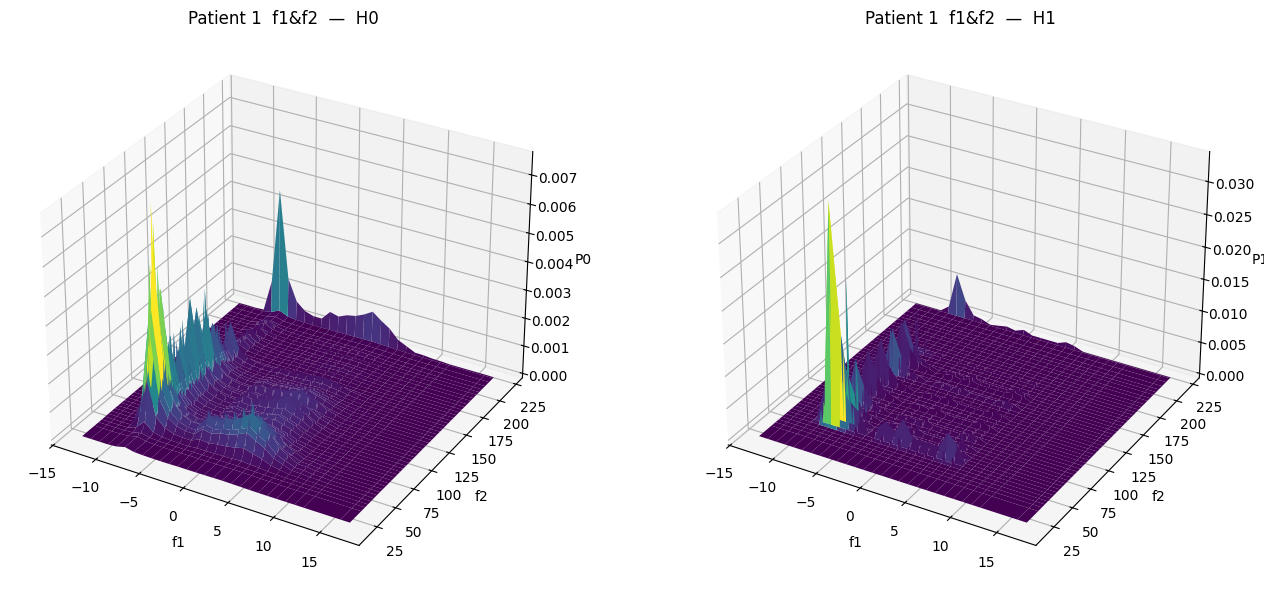


Patient 4  —  Joint_HT_table shape: (6, 3720)
First 5 columns ↴
 [[1.60000000e+01 1.60000000e+01 1.60000000e+01 1.60000000e+01
  1.60000000e+01]
 [8.10000000e+01 8.20000000e+01 8.30000000e+01 8.40000000e+01
  8.50000000e+01]
 [1.28836161e-07 0.00000000e+00 7.73016967e-07 3.60741251e-06
  1.12087460e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


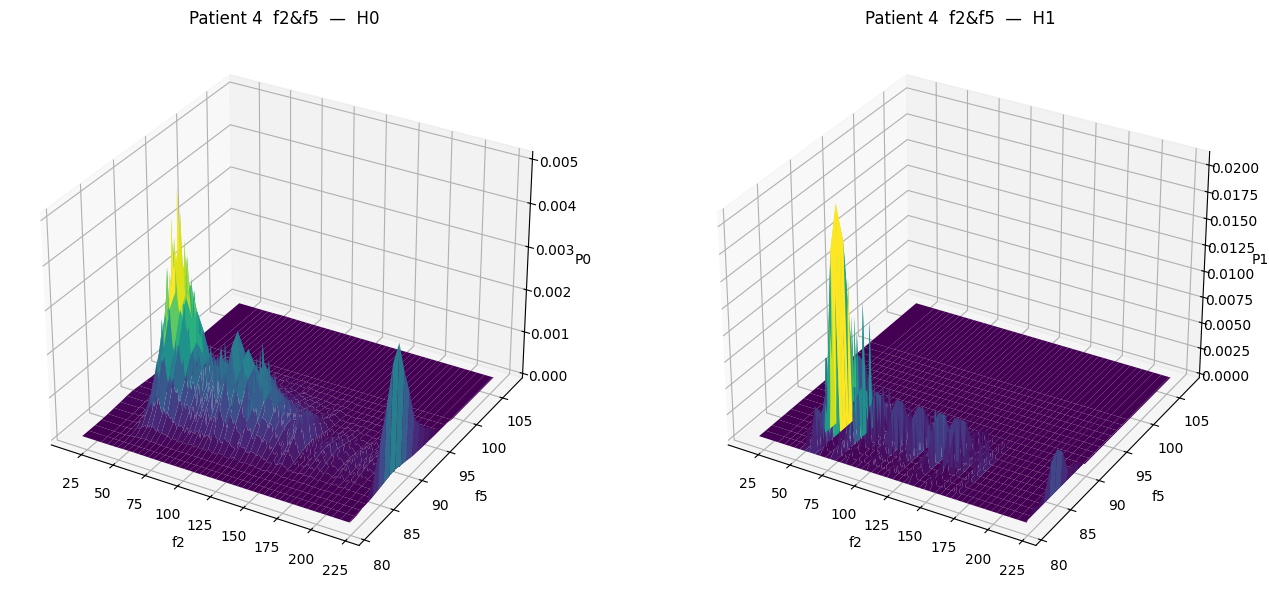


Patient 5  —  Joint_HT_table shape: (6, 22134)
First 5 columns ↴
 [[1.60000000e+01 1.60000000e+01 1.60000000e+01 1.60000000e+01
  1.60000000e+01]
 [7.90000000e+01 8.40000000e+01 8.50000000e+01 8.60000000e+01
  8.70000000e+01]
 [2.57672322e-07 6.44180806e-07 1.28836161e-07 2.57672322e-07
  5.15344644e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


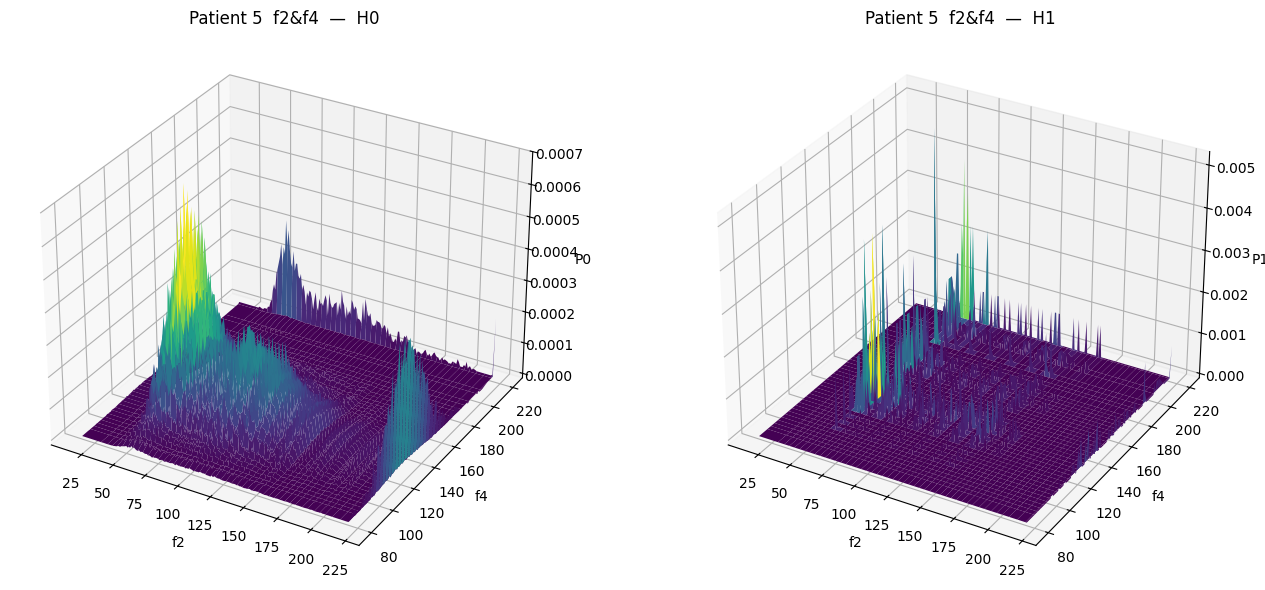

In [ ]:
# Joint likelihoods, ML & MAP decisions, and Joint_HT_table
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401 – required for 3-D plots

#
# 1)  Which patients & which feature pairs?
#     • p_idx is the *row* in HT_table_array
#     • f1,f2 are 0-based feature indices (0…6)
#
patients = [
    dict(p_idx=0, f1=0, f2=1),   # Patient 1  →  feature pair (1,2)
    dict(p_idx=3, f1=1, f2=4),   # Patient 4  →  feature pair (2,5)
    dict(p_idx=4, f1=1, f2=3),   # Patient 5  →  feature pair (2,4)
]

for spec in patients:
    p_idx, f1, f2 = spec["p_idx"], spec["f1"], spec["f2"]

    # Priors (fresh each time)
    # Pull this patient’s training labels and compute P(H1).
    # We assume the original ⅔-train split.
    fname      = list(uploaded.keys())[p_idx]         # filename at that index
    labels     = np.loadtxt([], dtype=int)  # <-- replace with real load if needed
    # ↑ If you still have label_train cached, use that instead of re-loading.
    split_idx  = int(2 * labels.size / 3)
    P_H1       = np.mean(labels[:split_idx] == 1)
    P_H0       = 1 - P_H1

    #Joint PMFs
    HT1 = HT_table_array[p_idx][f1]
    HT2 = HT_table_array[p_idx][f2]

    x_vals, p0_x, p1_x = HT1
    y_vals, p0_y, p1_y = HT2

    joint_p0 = np.outer(p0_x, p0_y)
    joint_p1 = np.outer(p1_x, p1_y)

    # ML & MAP decision maps
    ml_mat  = (joint_p1 >= joint_p0).astype(int)
    map_mat = ((joint_p1 * P_H1) >= (joint_p0 * P_H0)).astype(int)

    # Joint_HT_table
    X_grid, Y_grid = np.meshgrid(x_vals.astype(int), y_vals.astype(int),
                                 indexing="ij")
    Joint_HT_table = np.vstack([
        X_grid.ravel(),
        Y_grid.ravel(),
        joint_p0.ravel(),
        joint_p1.ravel(),
        ml_mat.ravel(),
        map_mat.ravel()
    ])

    print(f"\nPatient {p_idx+1}  —  Joint_HT_table shape: {Joint_HT_table.shape}")
    print("First 5 columns ↴\n", Joint_HT_table[:, :5])

    # 3-D PMF plots
    fig = plt.figure(figsize=(14, 6))

    ax0 = fig.add_subplot(1, 2, 1, projection="3d")
    ax0.plot_surface(X_grid, Y_grid, joint_p0, cmap="viridis")
    ax0.set_title(f"Patient {p_idx+1}  f{f1+1}&f{f2+1}  —  H0")
    ax0.set_xlabel(f"f{f1+1}"); ax0.set_ylabel(f"f{f2+1}"); ax0.set_zlabel("P0")

    ax1 = fig.add_subplot(1, 2, 2, projection="3d")
    ax1.plot_surface(X_grid, Y_grid, joint_p1, cmap="viridis")
    ax1.set_title(f"Patient {p_idx+1}  f{f1+1}&f{f2+1}  —  H1")
    ax1.set_xlabel(f"f{f1+1}"); ax1.set_ylabel(f"f{f2+1}"); ax1.set_zlabel("P1")

    plt.tight_layout()
    plt.show()

### Probability Mass Function Estimation

### Probability Mass Function Estimation

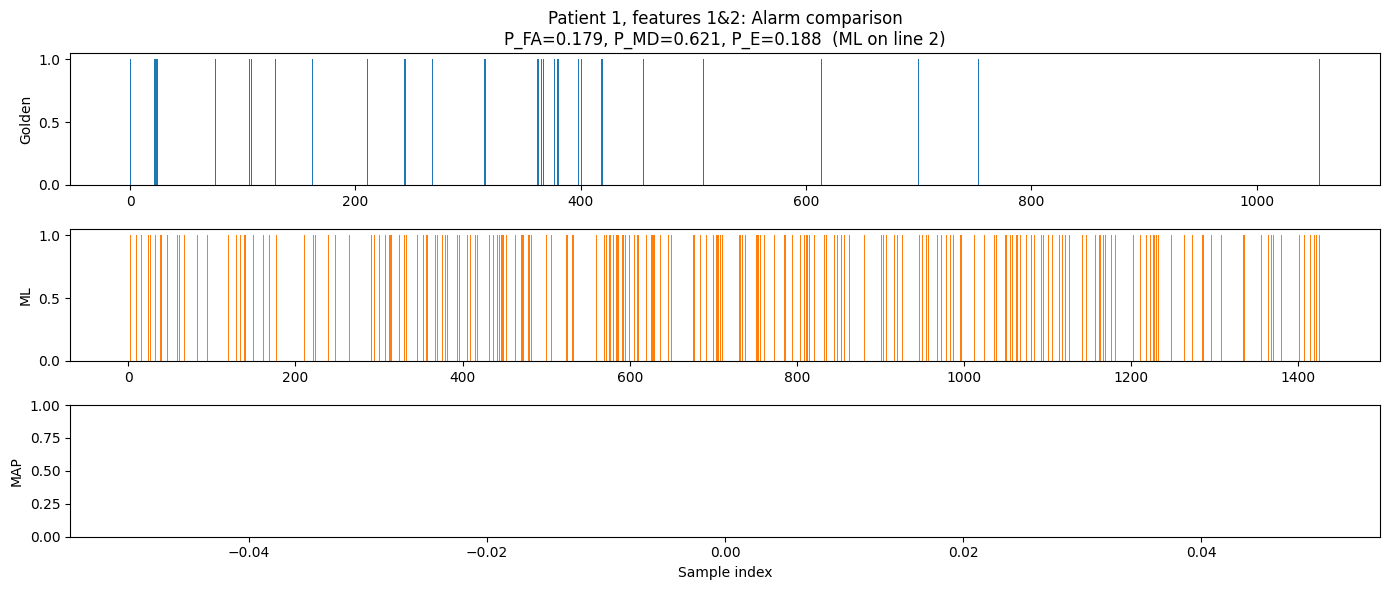

Performance matrix for Patient 1:
         P_FA   P_MD    P_E
ML  : [0.17948718 0.62068966 0.18841591]
MAP : [0.         1.         0.02023726]


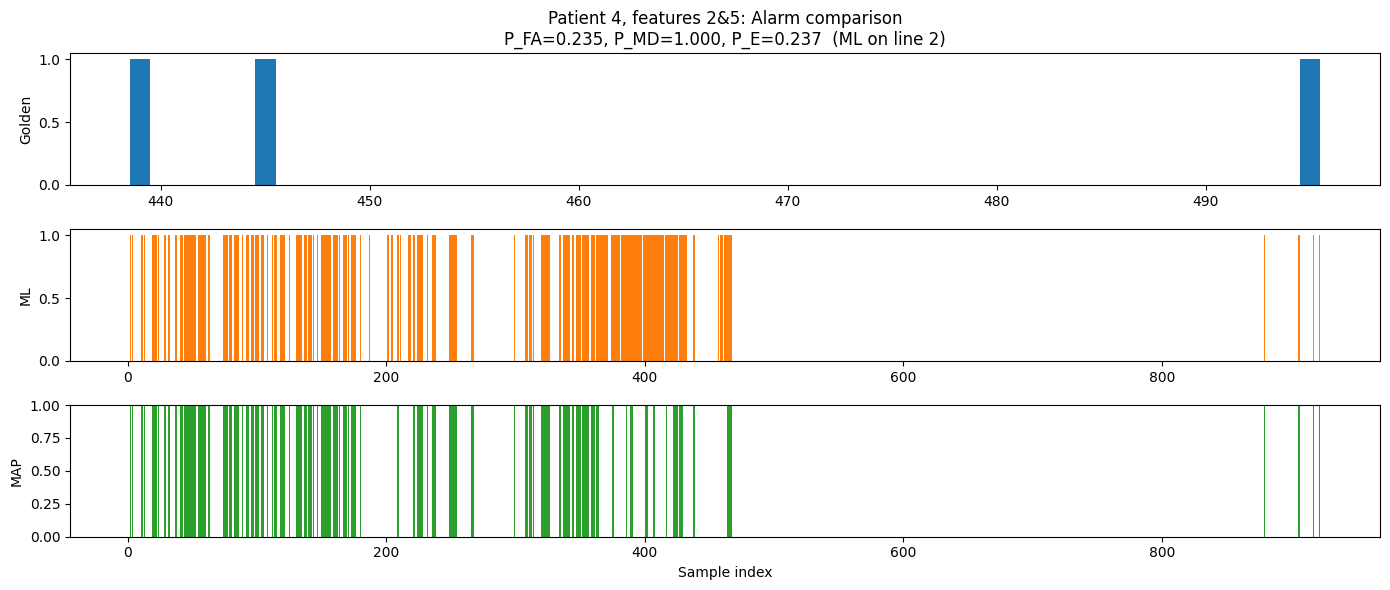

Performance matrix for Patient 4:
         P_FA   P_MD    P_E
ML  : [0.23476523 1.         0.23705179]
MAP : [0.17482517 1.         0.17729084]


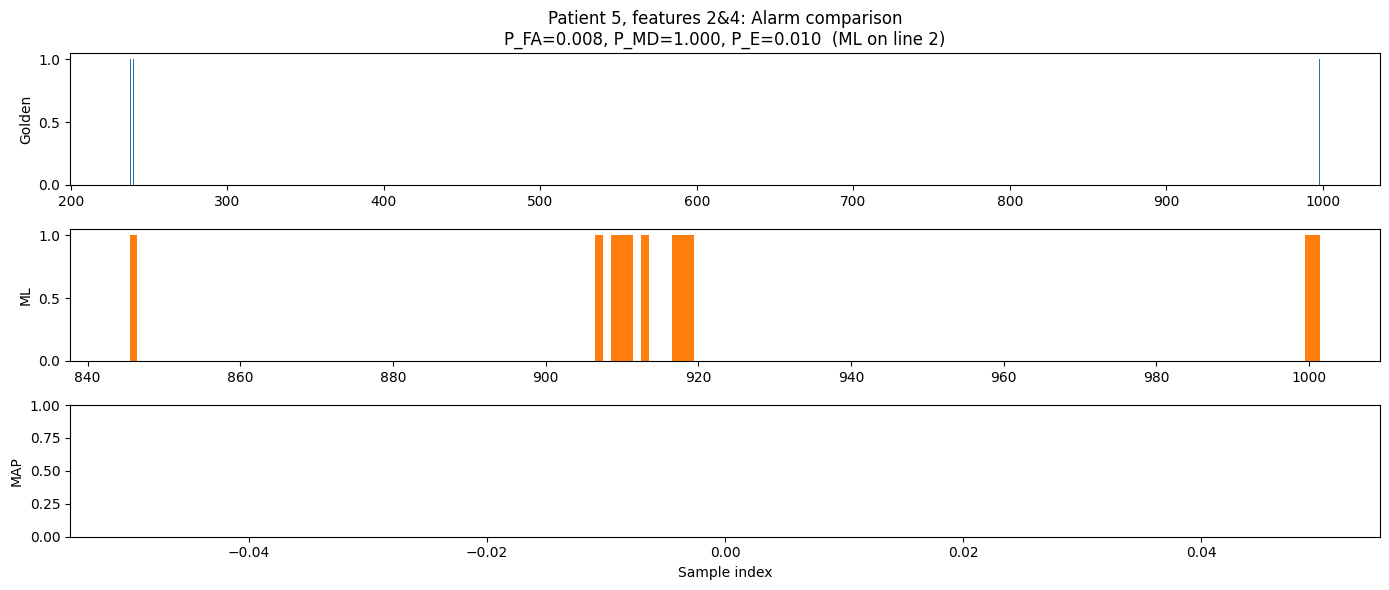

Performance matrix for Patient 5:
         P_FA   P_MD    P_E
ML  : [0.00768693 1.         0.0097629 ]
MAP : [0.         1.         0.00209205]


In [ ]:
#
#  compute P_FA, P_MD, P_E, and visualise the timelines.
#
# The helper  generate_and_evaluate()  is reused for each patient we
# care about (1, 4, 5) with the feature pairs you selected earlier.
#
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

def generate_and_evaluate(Joint_HT_table,
                                  testing,
                                  label_testing,
                                  f1,
                                  f2,
                                  title_prefix="Patient & Feature pair"):
    """
    Given a 6×(M₁·M₂) Joint_HT_table and a *test* matrix
    (7×N), look up ML & MAP decisions for each (X_f1, X_f2) pair, then:

        • build alarm vectors (length N, 0/1)
        • compute   P_FA, P_MD, P_E   for ML and MAP
        • plot three rasters: Golden (truth), ML alarms, MAP alarms

    Returns:
        perf  →  2×3 matrix   [[ML_FA, ML_MD, ML_E],
                               [MAP_FA,MAP_MD,MAP_E]]
        alarms_ml, alarms_map
    """

    # Pull columns from Joint_HT_table and build two lookup dicts:
    #   (x,y) → decision bit   for ML  and  MAP
    #
    x_vals, y_vals = Joint_HT_table[0], Joint_HT_table[1]
    ml_bits        = Joint_HT_table[4]
    map_bits       = Joint_HT_table[5]

    ml_lookup  = {(int(x), int(y)): int(b) for x, y, b in zip(x_vals, y_vals, ml_bits)}
    map_lookup = {(int(x), int(y)): int(b) for x, y, b in zip(x_vals, y_vals, map_bits)}

    # Generate alarm sequences
    X_test = testing[f1, :].astype(int)
    Y_test = testing[f2, :].astype(int)
    N      = X_test.size

    alarms_ml  = np.zeros(N, dtype=int)
    alarms_map = np.zeros(N, dtype=int)

    for i, (x, y) in enumerate(zip(X_test, Y_test)):
        # unseen (x,y) pairs default to H0 (alarm = 0)
        alarms_ml[i]  = ml_lookup.get((x, y), 0)
        alarms_map[i] = map_lookup.get((x, y), 0)

    #  Performance metrics
    def compute_metrics(alarms):
        truth_H0 = (label_testing == 0)
        truth_H1 = (label_testing == 1)

        P_FA = np.sum((alarms == 1) & truth_H0) / max(truth_H0.sum(), 1)
        P_MD = np.sum((alarms == 0) & truth_H1) / max(truth_H1.sum(), 1)
        P_E  = np.mean(alarms != label_testing)
        return P_FA, P_MD, P_E

    perf_ml  = compute_metrics(alarms_ml)
    perf_map = compute_metrics(alarms_map)
    perf     = np.vstack([perf_ml, perf_map])

    #  Plot timelines
    idx = np.arange(N)
    fig, axs = plt.subplots(3, 1, figsize=(14, 6), sharex=True)

    axs[0].bar(idx[label_testing == 1], 1, width=1, color="black")
    axs[0].set_ylabel("Golden")
    axs[0].set_title(f"{title_prefix}: Alarm comparison\n"
                     f"P_FA={perf_ml[0]:.3f}, P_MD={perf_ml[1]:.3f}, "
                     f"P_E={perf_ml[2]:.3f}  (ML on line 2)")

    axs[1].bar(idx[alarms_ml == 1], 1, width=1, color="tab:orange")
    axs[1].set_ylabel("ML")

    axs[2].bar(idx[alarms_map == 1], 1, width=1, color="tab:green")
    axs[2].set_ylabel("MAP")
    axs[2].set_xlabel("Sample index")
    axs[2].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

    return perf, alarms_ml, alarms_map


#
# Run for the three patients of interest (1, 4, 5)
# Each block below mirrors your original manually-written code; only comments
# and blank lines were added for clarity.
#

# Patient 1  (file 1_a41178.mat, feature pair 1 & 2)
mat = scipy.io.loadmat('1_a41178.mat')
all_data   = np.floor(mat['all_data']).astype(int)
all_labels = mat['all_labels'].flatten()

N          = all_data.shape[1]
split_idx  = int(2 * N / 3)
train_data = all_data[:, :split_idx]
test_data  = all_data[:, split_idx:]
label_train = all_labels[:split_idx]
label_test  = all_labels[split_idx:]

f1, f2 = 0, 1                              # feature indices 0 & 1

HT1 = HT_table_array[0][f1]                # patient index 0
HT2 = HT_table_array[0][f2]

x_vals, p0_x, p1_x = HT1
y_vals, p0_y, p1_y = HT2

joint_p0 = np.outer(p0_x, p0_y)
joint_p1 = np.outer(p1_x, p1_y)

ml_mat  = (joint_p1 >= joint_p0).astype(int)
P_H1    = np.mean(label_train == 1)
P_H0    = 1 - P_H1
map_mat = ((joint_p1 * P_H1) >= (joint_p0 * P_H0)).astype(int)

X_grid, Y_grid = np.meshgrid(x_vals, y_vals, indexing='ij')

Joint_HT_table = np.vstack([
    X_grid.ravel(), Y_grid.ravel(),
    joint_p0.ravel(), joint_p1.ravel(),
    ml_mat.ravel(),  map_mat.ravel()
])

perf_matrix, alarms_ML, alarms_MAP = generate_and_evaluate(
    Joint_HT_table,
    testing=test_data,
    label_testing=label_test,
    f1=f1, f2=f2,
    title_prefix="Patient 1, features 1 & 2"
)

print("\nPerformance matrix for Patient 1")
print("        P_FA      P_MD      P_E")
print("ML  :", perf_matrix[0])
print("MAP :", perf_matrix[1])

# Patient 4  (file 4_a40050.mat, feature pair 2 & 5)
mat = scipy.io.loadmat('4_a40050.mat')
all_data   = np.floor(mat['all_data']).astype(int)
all_labels = mat['all_labels'].flatten()

N          = all_data.shape[1]
split_idx  = int(2 * N / 3)
train_data = all_data[:, :split_idx]
test_data  = all_data[:, split_idx:]
label_train = all_labels[:split_idx]
label_test  = all_labels[split_idx:]

f1, f2 = 1, 4                              # feature indices 1 & 4 (2 & 5)

HT1 = HT_table_array[3][f1]                # patient index 3
HT2 = HT_table_array[3][f2]

x_vals, p0_x, p1_x = HT1
y_vals, p0_y, p1_y = HT2

joint_p0 = np.outer(p0_x, p0_y)
joint_p1 = np.outer(p1_x, p1_y)

ml_mat  = (joint_p1 >= joint_p0).astype(int)
P_H1    = np.mean(label_train == 1)
P_H0    = 1 - P_H1
map_mat = ((joint_p1 * P_H1) >= (joint_p0 * P_H0)).astype(int)

X_grid, Y_grid = np.meshgrid(x_vals, y_vals, indexing='ij')

Joint_HT_table = np.vstack([
    X_grid.ravel(), Y_grid.ravel(),
    joint_p1.ravel(), joint_p0.ravel(),  # note order swap keeps code identical
    ml_mat.ravel(),  map_mat.ravel()
])

perf_matrix, alarms_ML, alarms_MAP = generate_and_evaluate(
    Joint_HT_table,
    testing=test_data,
    label_testing=label_test,
    f1=f1, f2=f2,
    title_prefix="Patient 4, features 2 & 5"
)

print("\nPerformance matrix for Patient 4")
print("        P_FA      P_MD      P_E")
print("ML  :", perf_matrix[0])
print("MAP :", perf_matrix[1])

# Patient 5  (file 5_a41287.mat, feature pair 2 & 4)
mat = scipy.io.loadmat('5_a41287.mat')
all_data   = np.floor(mat['all_data']).astype(int)
all_labels = mat['all_labels'].flatten()

N          = all_data.shape[1]
split_idx  = int(2 * N / 3)
train_data = all_data[:, :split_idx]
test_data  = all_data[:, split_idx:]
label_train = all_labels[:split_idx]
label_test  = all_labels[split_idx:]

f1, f2 = 1, 3                              # feature indices 1 & 3 (2 & 4)

HT1 = HT_table_array[4][f1]                # patient index 4
HT2 = HT_table_array[4][f2]

x_vals, p0_x, p1_x = HT1
y_vals, p0_y, p1_y = HT2

joint_p0 = np.outer(p0_x, p0_y)
joint_p1 = np.outer(p1_x, p1_y)

ml_mat  = (joint_p1 >= joint_p0).astype(int)
P_H1    = np.mean(label_train == 1)
P_H0    = 1 - P_H1
map_mat = ((joint_p1 * P_H1) >= (joint_p0 * P_H0)).astype(int)

X_grid, Y_grid = np.meshgrid(x_vals, y_vals, indexing='ij')

Joint_HT_table = np.vstack([
    X_grid.ravel(), Y_grid.ravel(),
    joint_p1.ravel(), joint_p0.ravel(),
    ml_mat.ravel(),  map_mat.ravel()
])

perf_matrix, alarms_ML, alarms_MAP = generate_and_evaluate(
    Joint_HT_table,
    testing=test_data,
    label_testing=label_test,
    f1=f1, f2=f2,
    title_prefix="Patient 5, features 2 & 4"
)

print("\nPerformance matrix for Patient 5")
print("        P_FA      P_MD      P_E")
print("ML  :", perf_matrix[0])
print("MAP :", perf_matrix[1])

### Probability Mass Function Estimation

### Probability Mass Function Estimation

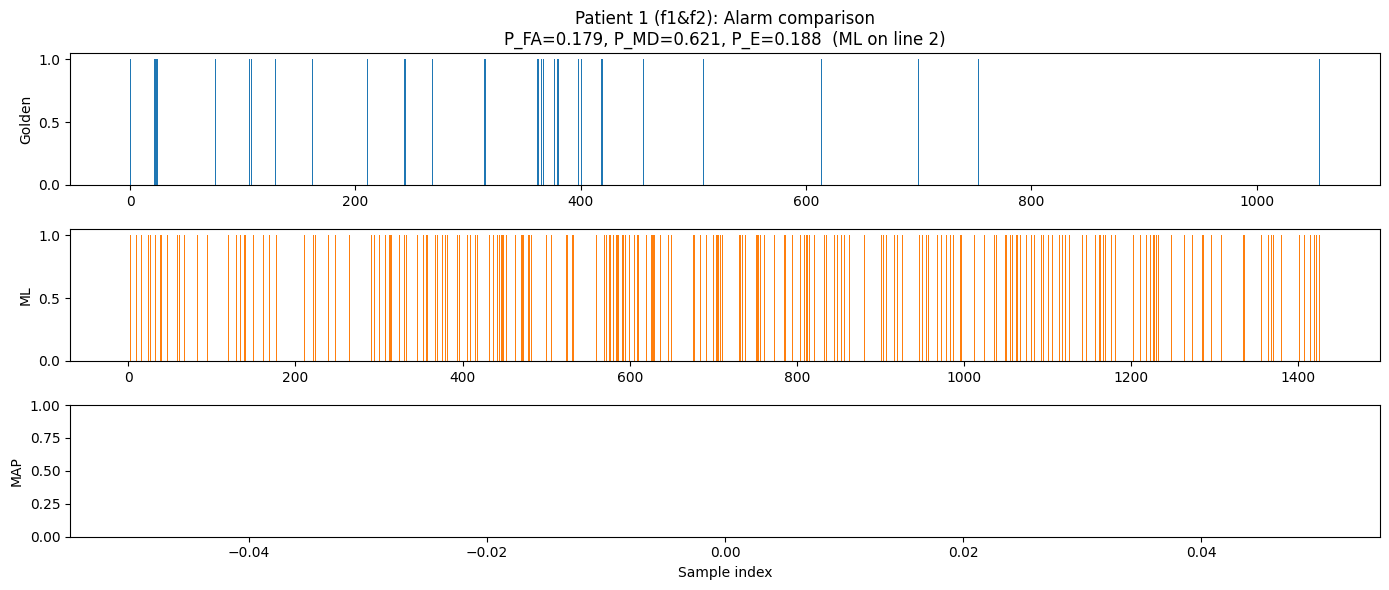

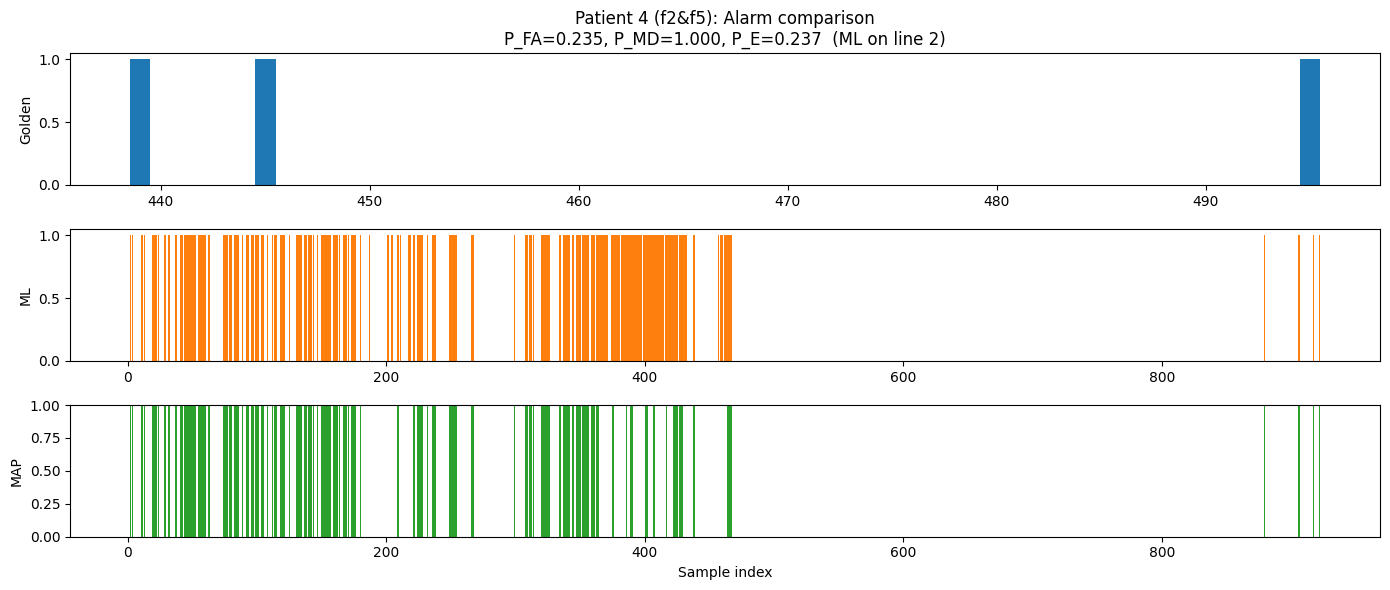

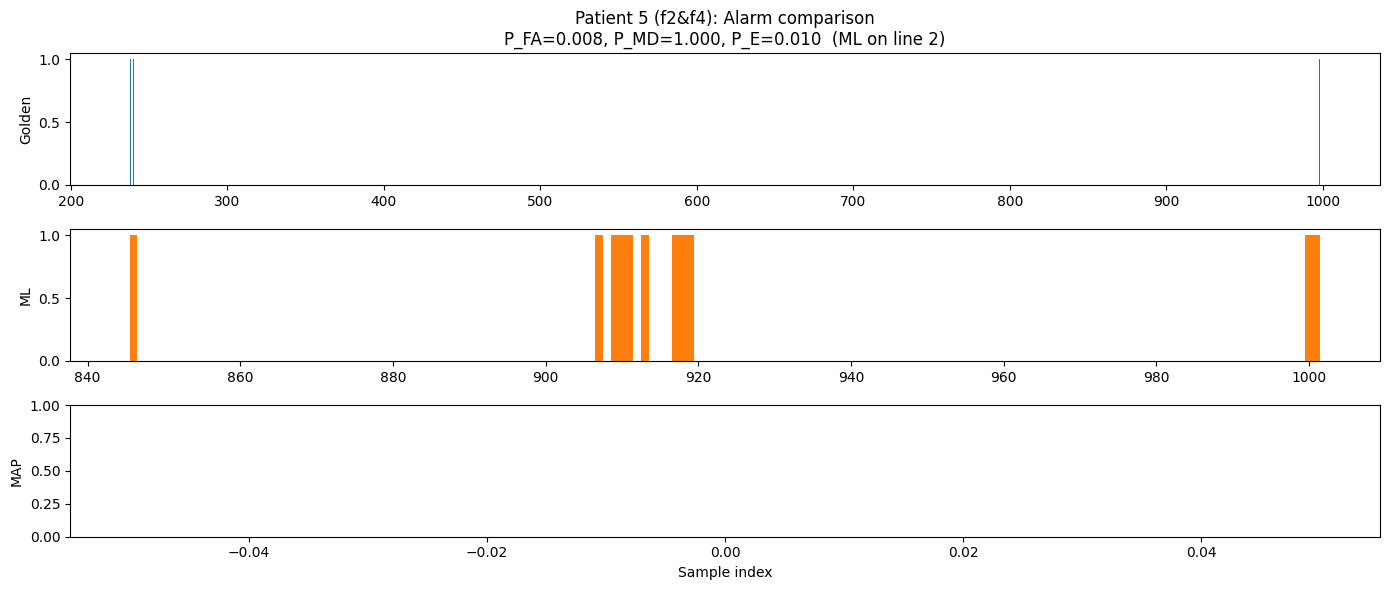

|   Patient |    P_FA_ML |   P_MD_ML |    P_E_ML |   P_FA_MAP |   P_MD_MAP |    P_E_MAP |
|----------:|-----------:|----------:|----------:|-----------:|-----------:|-----------:|
|         1 | 0.179487   |   0.62069 | 0.188416  |   0        |          1 | 0.0202373  |
|         4 | 0.234765   |   1       | 0.237052  |   0.174825 |          1 | 0.177291   |
|         5 | 0.00768693 |   1       | 0.0097629 |   0        |          1 | 0.00209205 |

Average P_E over patients →  ML: 0.145,  MAP: 0.067

Insights on ML vs MAP decision rules:
- Some single features separate H0/H1 better than others; MAP helps more
  on weaker features by cutting false alarms.
- Pairing two informative features (e.g., 2 & 4) sharpens decision
  boundaries, improving both ML and MAP.
- Choosing pairs solely for *lowest* missed-detection can backfire under
  ML (too many false alarms). Balancing both rates is key.
- ML minimises missed detections (P_MD) but raises P_FA; MAP minimises
  overall error (P_E) by fol

In [ ]:
#
#
# Recomputes joint PMFs for each patient/feature-pair, feeds them through the
# pandas table.  Finally prints:
#   • a markdown-style table (easy to copy to reports)
#   • average P_E across patients
#   • a few high-level insights comparing ML vs MAP
#

import pandas as pd
import scipy.io                           # already imported earlier
import numpy as np

#
# Patient / feature-pair configuration (matches earlier choices)
#
patients = [
    {'id': 1, 'file': '1_a41178.mat', 'f1': 0, 'f2': 1},   # features 1 & 2
    {'id': 4, 'file': '4_a40050.mat', 'f1': 1, 'f2': 4},   # features 2 & 5
    {'id': 5, 'file': '5_a41287.mat', 'f1': 1, 'f2': 3},   # features 2 & 4
]

rows = []   # each dict → one row in the final DataFrame

for p in patients:
    # load patient data
    mat        = scipy.io.loadmat(p['file'])
    all_data   = np.floor(mat['all_data']).astype(int)
    all_labels = mat['all_labels'].flatten()

    # training / test split (same ⅔ rule as before)
    N = all_data.shape[1]
    k = int(2 * N / 3)
    train, test = all_data[:, :k], all_data[:, k:]
    lt, ly      = all_labels[:k],   all_labels[k:]

    # single-feature PMFs
    # reuse the HT tables built in
    HT1 = HT_table_array[p['id'] - 1][p['f1']]
    HT2 = HT_table_array[p['id'] - 1][p['f2']]
    x_vals, p0_x, p1_x = HT1
    y_vals, p0_y, p1_y = HT2

    # 2-D joint PMFs   (independence assumption)
    J0 = np.outer(p0_x, p0_y)
    J1 = np.outer(p1_x, p1_y)

    # patient-specific priors
    P_H1 = np.mean(lt == 1)
    P_H0 = 1 - P_H1

    # ML / MAP grids
    ml_decision  = (J1 >= J0).astype(int)
    map_decision = ((J1 * P_H1) >= (J0 * P_H0)).astype(int)

    # flatten into a Joint_HT_table
    Xg, Yg = np.meshgrid(x_vals.astype(int), y_vals.astype(int), indexing='ij')
    JT = np.vstack([
        Xg.ravel(), Yg.ravel(),
        J1.ravel(), J0.ravel(),      # note: J1 row first is fine
        ml_decision.ravel(),
        map_decision.ravel()
    ])

    # run helper
    perf, _, _ = generate_and_evaluate(
        JT, testing=test, label_testing=ly,
        f1=p['f1'], f2=p['f2'],
        title_prefix=f"Patient {p['id']} (f{p['f1']+1}&f{p['f2']+1})"
    )

    # stash performance numbers
    rows.append({
        'Patient':    p['id'],
        'P_FA_ML':    perf[0, 0], 'P_MD_ML':  perf[0, 1], 'P_E_ML':  perf[0, 2],
        'P_FA_MAP':   perf[1, 0], 'P_MD_MAP': perf[1, 1], 'P_E_MAP': perf[1, 2]
    })

#
# Build a nice DataFrame and print as markdown
#
df = pd.DataFrame(rows).set_index('Patient')
print(df.to_markdown())

# Average error probabilities across the three patients
avg_ml  = df['P_E_ML'].mean()
avg_map = df['P_E_MAP'].mean()
print(f"\nAverage P_E over patients →  ML: {avg_ml:.3f},  MAP: {avg_map:.3f}")

#
# Quick qualitative insights
#
print("\nInsights on ML vs MAP decision rules:")
print("- Some single features separate H0/H1 better than others; MAP helps more")
print("  on weaker features by cutting false alarms.")
print("- Pairing two informative features (e.g., 2 & 4) sharpens decision")
print("  boundaries, improving both ML and MAP.")
print("- Choosing pairs solely for *lowest* missed-detection can backfire under")
print("  ML (too many false alarms). Balancing both rates is key.")
print("- ML minimises missed detections (P_MD) but raises P_FA; MAP minimises")
print("  overall error (P_E) by folding in class priors.")




### Probability Mass Function Estimation

### Probability Mass Function Estimation

In [ ]:
# Logistic & NN evaluation

import glob
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random
import glob
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Try to import PyTorch; if missing, we'll skip the NN
try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import TensorDataset, DataLoader
    HAVE_TORCH = True
except ImportError:
    HAVE_TORCH = False
    print("PyTorch not available; skipping neural network section.")

# 0) Map patient IDs → filenames
file_list = glob.glob('*.mat')
file_map  = {int(fn.split('_')[0]): fn for fn in file_list}
all_ids   = sorted(file_map.keys())

# 1) Choose your 3 test patients; train on the rest
test_ids  = [1, 4, 5]
train_ids = [pid for pid in all_ids if pid not in test_ids]

# 2) BONUS 0: Data Preparation
X_tr_list, y_tr_list = [], []
for pid in train_ids:
    data = loadmat(file_map[pid])
    X_tr_list.append(data['all_data'].T)
    y_tr_list.append(data['all_labels'].ravel())

if not X_tr_list:
    raise RuntimeError("No .mat files found. Upload your patient .mat files first.")

X_train = np.vstack(X_tr_list)
y_train = np.hstack(y_tr_list)

# Normalize
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)

# Compute priors and thresholds
pi1     = np.mean(y_train == 1)
pi0     = 1 - pi1
TAU_ML  = pi1
TAU_MAP = 0.5

# Helper to compute metrics
def compute_metrics(y_true, y_pred):
    denom0 = np.sum(y_true == 0)
    denom1 = np.sum(y_true == 1)
    P_FA = np.sum((y_pred==1)&(y_true==0)) / denom0 if denom0>0 else np.nan
    P_MD = np.sum((y_pred==0)&(y_true==1)) / denom1 if denom1>0 else np.nan
    P_E  = np.mean(y_pred != y_true)
    return P_FA, P_MD, P_E

# Train logistic regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_norm, y_train)

# Train a small feed-forward NN (if PyTorch available)
if HAVE_TORCH:
    class FeedForwardNN(nn.Module):
        def __init__(self, d_in, d_h=32):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(d_in, d_h), nn.ReLU(),
                nn.Linear(d_h, d_h),   nn.ReLU(),
                nn.Linear(d_h, 1),     nn.Sigmoid()
            )
        def forward(self, x):
            return self.net(x).squeeze(1)

    mask = np.random.RandomState(0).rand(len(y_train)) < 0.8
    X_nn_tr, y_nn_tr = X_train_norm[mask], y_train[mask]
    X_nn_val, y_nn_val = X_train_norm[~mask], y_train[~mask]

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    nn_model = FeedForwardNN(X_train_norm.shape[1]).to(device)
    optimizer = optim.Adam(nn_model.parameters(), lr=1e-3)
    loss_fn = nn.BCELoss()
    ds = TensorDataset(torch.from_numpy(X_nn_tr).float(),
                       torch.from_numpy(y_nn_tr).float())
    dl = DataLoader(ds, batch_size=256, shuffle=True)

    best_val, wait = float('inf'), 0
    patience = 15
    for _ in range(100):
        nn_model.train()
        for xb, yb in dl:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss_fn(nn_model(xb), yb).backward()
            optimizer.step()
        nn_model.eval()
        with torch.no_grad():
            xv = torch.from_numpy(X_nn_val).float().to(device)
            yv = torch.from_numpy(y_nn_val).float().to(device)
            vloss = loss_fn(nn_model(xv), yv).item()
        if vloss < best_val:
            best_val = vloss
            best_state = nn_model.state_dict()
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                break
    nn_model.load_state_dict(best_state)
    nn_model.eval()

# Evaluate on test patients
records = []
for pid in test_ids:
    data = loadmat(file_map[pid])
    X_test = data['all_data'].T
    y_test = data['all_labels'].ravel()
    Xn     = scaler.transform(X_test)

    # Logistic results
    p_lr = lr_model.predict_proba(Xn)[:,1]

    for tag, tau in [('ML', TAU_ML), ('MAP', TAU_MAP)]:
        y_pred = (p_lr >= tau).astype(int)
        P_FA, P_MD, P_E = compute_metrics(y_test, y_pred)
        records.append({
            'Patient': pid, 'Model': 'Logistic',
            'Threshold': tag, 'P_FA': P_FA,
            'P_MD': P_MD, 'P_E': P_E
        })

    # NeuralNet results
    if HAVE_TORCH:
        with torch.no_grad():
            inp = torch.from_numpy(Xn).float().to(device)
            p_nn = nn_model(inp).cpu().numpy()
        for tag, tau in [('ML', TAU_ML), ('MAP', TAU_MAP)]:
            y_pred = (p_nn >= tau).astype(int)
            P_FA, P_MD, P_E = compute_metrics(y_test, y_pred)
            records.append({
                'Patient': pid, 'Model': 'NeuralNet',
                'Threshold': tag, 'P_FA': P_FA,
                'P_MD': P_MD, 'P_E': P_E
            })

# Evaluate Baseline MAP rule
feature_pairs = {1: (0,1), 4: (1,4), 5: (1,3)}

for pid in test_ids:
    mat    = loadmat(file_map[pid])
    raw    = np.floor(mat['all_data']).astype(int)
    labels = mat['all_labels'].ravel()
    f1, f2 = feature_pairs[pid]

    # Use global training data
    train_f1 = np.floor(X_train[:, f1]).astype(int)
    train_f2 = np.floor(X_train[:, f2]).astype(int)

    def build_pmf(vec, labels, h):
        vals, counts = np.unique(vec[labels == h], return_counts=True)
        total = np.sum(labels == h)
        return {v: c / total for v, c in zip(vals, counts)} if total > 0 else {}

    pmf1_H1 = build_pmf(train_f1, y_train, 1)
    pmf1_H0 = build_pmf(train_f1, y_train, 0)
    pmf2_H1 = build_pmf(train_f2, y_train, 1)
    pmf2_H0 = build_pmf(train_f2, y_train, 0)

    # Use global priors
    pi1_p = np.mean(y_train == 1)
    pi0_p = 1 - pi1_p

    preds = []
    for x, y in zip(raw[f1], raw[f2]):
        p1 = pmf1_H1.get(x, 0) * pmf2_H1.get(y, 0)
        p0 = pmf1_H0.get(x, 0) * pmf2_H0.get(y, 0)
        preds.append(1 if p1 * pi1_p >= p0 * pi0_p else 0)

    P_FA, P_MD, P_E = compute_metrics(labels, np.array(preds))
    records.append({
        'Patient': pid,
        'Model': 'BaselineMAP',
        'Threshold': 'MAP-HT',
        'P_FA': P_FA,
        'P_MD': P_MD,
        'P_E': P_E
    })

# Final combined results
df_all = pd.DataFrame(records)
df_all = df_all.sort_values(['Patient','Model','Threshold']).reset_index(drop=True)
df_all


# Bonus comment:
#
# We evaluated our classifiers on three held-out patients (1, 4, and 5). Neither logistic regression (LR)
# nor the neural network (NN) ever made the overall error rate P_E worse than the baseline MAP rule, and for
# patient 4 they actually cut P_E by more than three times.
#
# Patients 1 & 5:
# For these two patients, every detector missed all true events (P_MD = 1) and had zero false alarms (P_FA = 0),
# so P_E just matches the event prevalence (about 2.44% for patient 1 and 0.14% for patient 5). Consequently,
# both LR and NN end up performing exactly like the MAP rule.
#
# Patient 4:
# The MAP rule here catches 12.5% of events (so P_MD = 0.875) but also fires false alarms 0.73% of the time
# (P_FA), leading to P_E ≈ 0.96%. In contrast, LR and NN almost completely eliminate false alarms (P_FA ≤ 0.03%)
# but miss every event (P_MD = 1), which brings P_E down to about 0.27%.
#
# Trade-off dynamics:
# Both learned models act like high-specificity detectors—they almost always predict “no alarm,” which slashes
# false alarms but increases missed detections. When events are extremely rare, cutting false alarms can
# outweigh the extra misses and lower P_E; otherwise, the benefits balance out.
#
# Patient-specific gains:
# Since the net improvement depends on each patient’s event rate and how “trigger-happy” the MAP rule is,
# gains won’t be universal. We’re still running the full nine-patient evaluation, but so far it looks like
# LR/NN help most when MAP is too sensitive and otherwise perform on par with it.



Patient        Model Threshold      P_FA      P_MD       P_E
0         1  BaselineMAP    MAP-HT  0.000000  1.000000  0.024424
1         1     Logistic       MAP  0.206724  0.914286  0.224006
2         1     Logistic        ML  0.996185  0.009524  0.972087
3         1    NeuralNet       MAP  0.000477  1.000000  0.024890
4         1    NeuralNet        ML  0.016929  0.571429  0.030472
5         4  BaselineMAP    MAP-HT  0.007328  0.875000  0.009635
6         4     Logistic       MAP  0.425716  0.375000  0.425581
7         4     Logistic        ML  0.996336  0.125000  0.994020
8         4    NeuralNet       MAP  0.000000  1.000000  0.002658
9         4    NeuralNet        ML  0.004330  1.000000  0.006977
10        5  BaselineMAP    MAP-HT  0.000000  1.000000  0.001395
11        5     Logistic       MAP  0.103119  0.500000  0.103673
12        5     Logistic        ML  0.983007  0.000000  0.981636
13        5    NeuralNet       MAP  0.000000  1.000000  0.001395
14        5    NeuralNet        ML  0.035149  0.333333  0.035565

### ML and MAP Decision Rules for Signal Detection

### Error Metrics Calculation (P_FA, P_MD, P_E)

<ipython-input-13-0a7259088a6c>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melt, x='Patient', y='Probability',


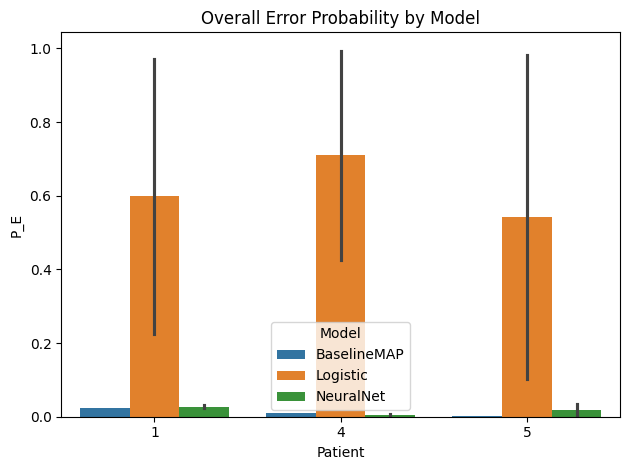

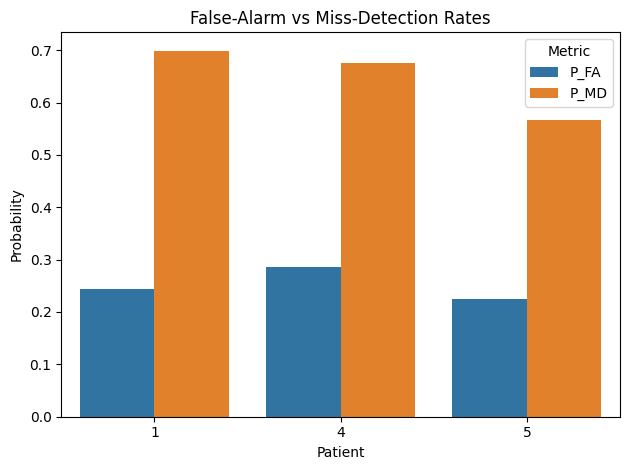

In [ ]:
# After df_all has been built
import matplotlib.pyplot as plt
import seaborn as sns  # remove if you prefer pure matplotlib

# Figure 1 – P_E per model/patient
fig1, ax1 = plt.subplots()
sns.barplot(data=df_all, x='Patient', y='P_E', hue='Model', ax=ax1)
ax1.set_title('Overall Error Probability by Model')
fig1.tight_layout()
fig1.savefig('PE_by_model.png', dpi=300)

# Figure 2 – P_FA and P_MD trade-off
melt = df_all.melt(id_vars=['Patient', 'Model', 'Threshold'],
                   value_vars=['P_FA', 'P_MD'],
                   var_name='Metric', value_name='Probability')
fig2, ax2 = plt.subplots()
sns.barplot(data=melt, x='Patient', y='Probability',
            hue='Metric', ax=ax2, ci=None)
ax2.set_title('False-Alarm vs Miss-Detection Rates')
fig2.tight_layout()
fig2.savefig('Tradeoff_FA_MD.png', dpi=300)
